# 1. NLP_Feature_Engineering Overview
tf-idf, LDA

In [1]:
###################################!pip install --upgrade pip################# upgrade pip ###############################
#python version 3.9 will fix collections import error
#!pip install gensim --verbose
#!pip install emojis matplotlib wordcloud
#!pip install emojis

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install nltk
#!pip install matplotlib
#!pip install spacy
#!pip install re
#!pip install tqdm
#!pip install collections
#!python -m spacy download en_core_web_sm
#! pip install wordcloud

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wuhangze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#!python -m spacy download en_core_web_sm
import spacy

import re
from collections import Counter

from tqdm import tqdm
tqdm.pandas()

from wordcloud import WordCloud

## 2. tf-idf, LDA

In [6]:
directory_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/github_thesis/deloitte_digital_banking/tucapital_scraper/downloads/'
translated_news_save_path = "tucapital-news_with_text-translated.csv"

# modify format
# Save the combined DataFrame to a CSV file
df_copy = pd.read_csv(directory_path+translated_news_save_path)
df_copy.head()

Unnamed: 0                                              title  \
0           0  Tomorrow, last day of the account at 2.89% APR...   
1           1  ING gives you up to €120 if you direct your pa...   
2           2  Banco BIG deposits: slight increase in normal ...   
3           3  The future of Bitcoin: predictions for the nex...   
4           4  Eco: Cetelem only allows maximum daily transfe...   

                                                 url        date  \
0  https://www.tucapital.es/depositos/manana-ulti...  23/04/2024   
1  https://www.tucapital.es/cuentas/ing-te-da-has...  22/04/2024   
2  https://www.tucapital.es/depositos/depositos-d...  22/04/2024   
3  https://www.tucapital.es/blogs/guias/el-futuro...  22/04/2024   
4  https://www.tucapital.es/blogs/eco/eco-cetelem...  19/04/2024   

                                                text  
0  Tomorrow, April 24, 2024, the marketing period...  
1  ING now asks, in addition to direct debiting a...  
2  Banco BIG remodels its deposit offer with slig...  
3  Since its launch, Bitcoin has seen positive an...  
4  Due to the disappearance of Orange Bank, and t...

### 2. Feature Engineering Extraction

In [7]:
# Filter where Not-expected rows
date_pattern = re.compile(r'-\d{2}/\d{2}/\d{4}:')
df_cleaned = df_copy[~df_copy['title'].str.contains(date_pattern)]
# Drop nan
df_cleaned = df_cleaned.dropna(subset=['title', 'url', 'date'])

df_copy.shape, df_cleaned.shape

((1025, 5), (1018, 5))

In [8]:
df_cleaned['combined_text'] = (df_cleaned['title'] + ' ') * 3 + df_cleaned['text']

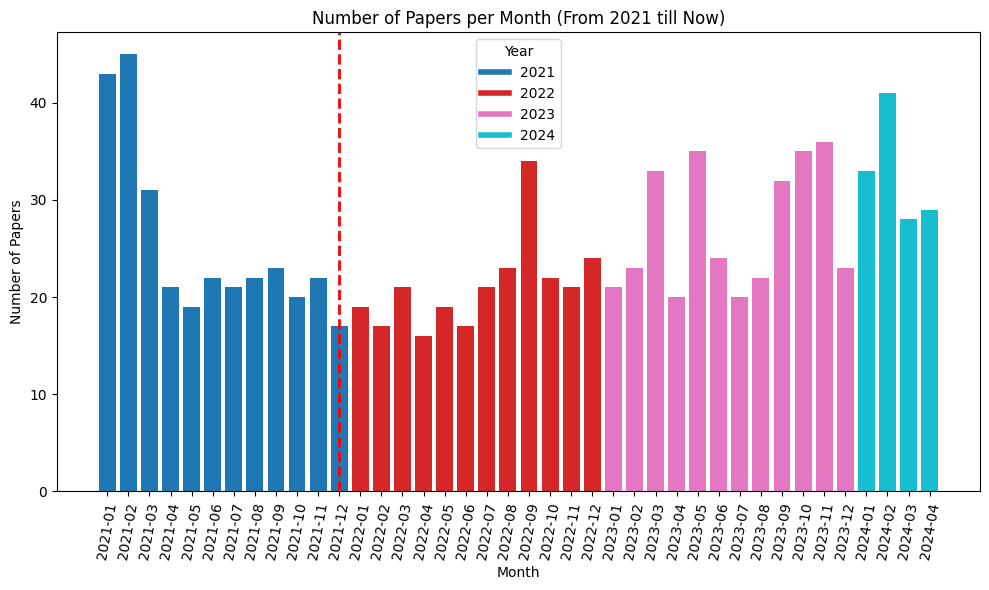

In [9]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and count entries
df_grouped = df_filtered.groupby(pd.Grouper(key='date', freq='M')).size()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped.index.year
unique_years = years.unique()
colors = plt.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Number of Papers per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Papers')

plt.tight_layout()
plt.show()


In [10]:
# Ensure 'combined_text' column is in the DataFrame
df_cleaned['combined_text'] = df_cleaned['combined_text'].astype(str)  # Convert to string in case it's not

# Count the number of words in each entry
df_cleaned['word_count'] = df_cleaned['combined_text'].apply(lambda x: len(x.split()))

# Verify the word counts
df_cleaned.head()

Unnamed: 0                                              title  \
0           0  Tomorrow, last day of the account at 2.89% APR...   
1           1  ING gives you up to €120 if you direct your pa...   
2           2  Banco BIG deposits: slight increase in normal ...   
3           3  The future of Bitcoin: predictions for the nex...   
4           4  Eco: Cetelem only allows maximum daily transfe...   

                                                 url       date  \
0  https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1  https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2  https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3  https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4  https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   

                                                text  \
0  Tomorrow, April 24, 2024, the marketing period...   
1  ING now asks, in addition to direct debiting a...   
2  Banco BIG remodels its deposit offer with slig...   
3  Since its launch, Bitcoin has seen positive an...   
4  Due to the disappearance of Orange Bank, and t...   

                                       combined_text  word_count  
0  Tomorrow, last day of the account at 2.89% APR...         318  
1  ING gives you up to €120 if you direct your pa...         400  
2  Banco BIG deposits: slight increase in normal ...         476  
3  The future of Bitcoin: predictions for the nex...         656  
4  Eco: Cetelem only allows maximum daily transfe...         450

In [11]:
# Convert the 'date' column to datetime if not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and sum the word counts
df_grouped_words = df_filtered.groupby(pd.Grouper(key='date', freq='M'))['word_count'].sum()

# Verify the grouped data
df_grouped_words.head()

date
2021-01-31    25283
2021-02-28    26524
2021-03-31    17448
2021-04-30    11207
2021-05-31     9619
Freq: ME, Name: word_count, dtype: int64

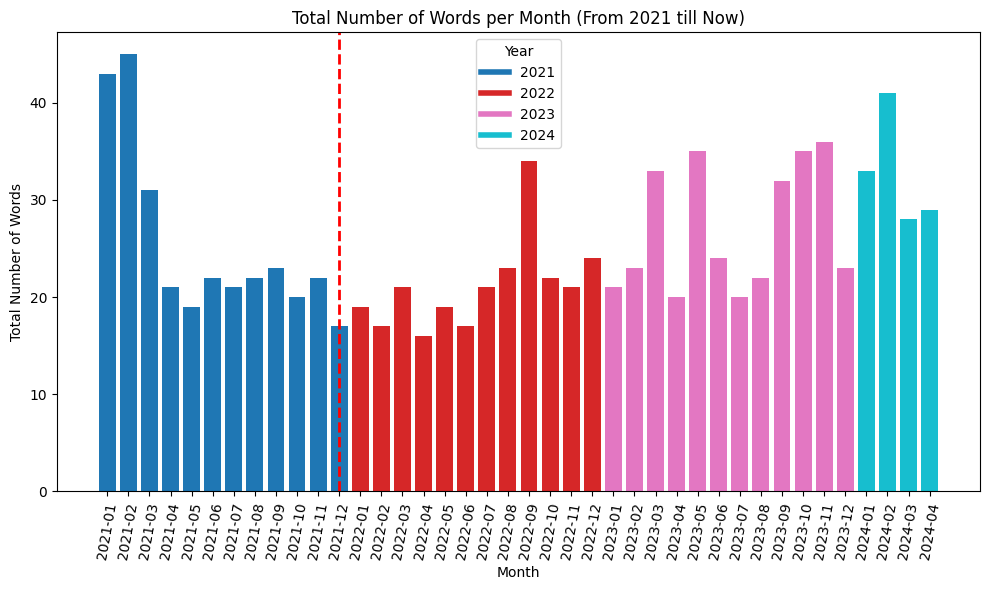

In [12]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and count entries
df_grouped_words = df_filtered.groupby(pd.Grouper(key='date', freq='M')).size()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped_words.index.year
unique_years = years.unique()
colors = plt.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped_words.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped_words)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped_words.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped_words.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Total Number of Words per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Words')

plt.tight_layout()  # Adjust layout to make room for label rotation

# Show the plot
plt.show()


In [13]:
# Convert the 'date' column to datetime if not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Group by month and calculate the average word count
df_grouped_avg_words = df_filtered.groupby(pd.Grouper(key='date', freq='M'))['word_count'].mean()

# Verify the grouped data
df_grouped_avg_words.head()


date
2021-01-31    587.976744
2021-02-28    589.422222
2021-03-31    562.838710
2021-04-30    533.666667
2021-05-31    506.263158
Freq: ME, Name: word_count, dtype: float64

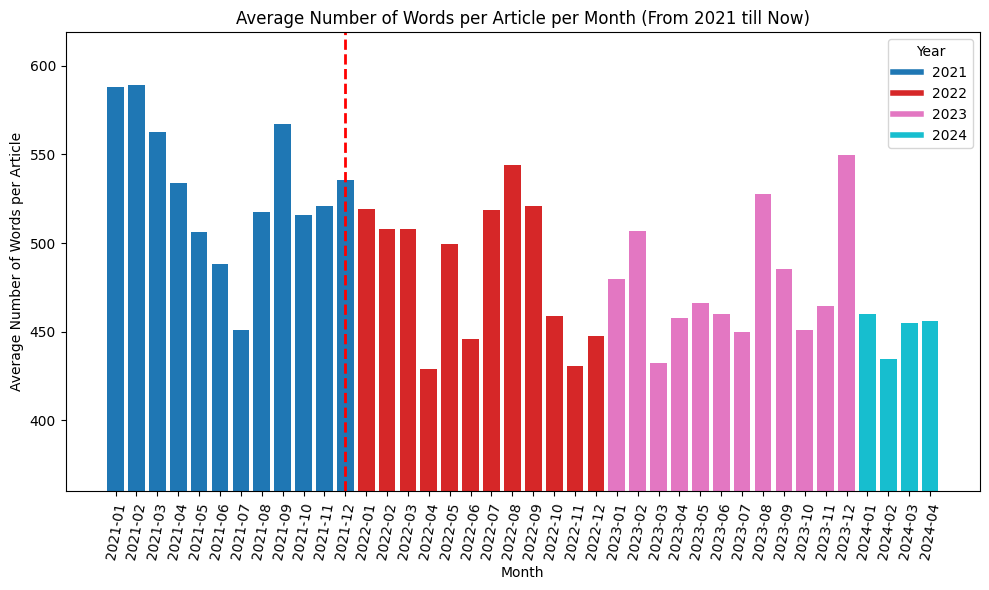

In [14]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the DataFrame to only include dates from 2021 to now
df_filtered = df_cleaned[(df_cleaned['date'] >= '2021-01-01') & (df_cleaned['date'] <= pd.Timestamp.today())]

# Calculate the average number of words per article per month
df_filtered['word_count'] = df_filtered['combined_text'].apply(lambda x: len(str(x).split()))
df_grouped_avg_words = df_filtered.groupby(pd.Grouper(key='date', freq='M'))['word_count'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assign colors to each year
years = df_grouped_avg_words.index.year
unique_years = years.unique()
colors = plt.get_cmap('tab10', len(unique_years))

# Plot each bar with the corresponding color
bars = []
for i, (date, count) in enumerate(df_grouped_avg_words.items()):
    color = colors(unique_years.tolist().index(date.year))
    bars.append(ax.bar(i, count, color=color))

# Set x-ticks
ax.set_xticks(range(len(df_grouped_avg_words)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in df_grouped_avg_words.index], rotation=80)

# Create a custom legend
handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_years))]
labels = unique_years
ax.legend(handles, labels, title='Year')

# Add vertical line for December 2021
start_month_index = df_grouped_avg_words.index.get_loc('2021-12-31')
ax.axvline(x=start_month_index, color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')

# Title and labels
ax.set_title('Average Number of Words per Article per Month (From 2021 till Now)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Number of Words per Article')

# Set y-axis limit to start from 360
ax.set_ylim(360, ax.get_ylim()[1])

plt.tight_layout()  # Adjust layout to make room for label rotation

# Show the plot
plt.show()


#### TF-IDF

#### Tokenizer

In [15]:
#### nlp component setting #####
porter = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
# Load spaCy model
sp = spacy.load('en_core_web_sm')

mod = 1

def remove_digits(token):
    # Use regex to remove digits
    token_without_digits = re.sub(r'\d+', '', token)
    return token_without_digits

def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){5,}', word):
        return word
    else:
        return word.lower()
    
def tokenize(text, modulation):
    # Define regex for emojis and "!"
    emoji_exclam_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251!]')
    
    tokens = []

    cleaned_text = emoji_exclam_pattern.sub(r'', text)
    if modulation < 3:
        for token in re.split(r'\W+', cleaned_text):
            token = remove_digits(token) # remove number
            if token is '': continue
            token = abbr_or_lower(token)
            if token and re.search('[a-zA-Z]', token):
                if modulation == 0:
                    tokens.append(token)
                elif modulation == 1 and token not in stop_words: # remove stop words
                    tokens.append(token)
                elif modulation == 2 and token not in stop_words and porter: # remove stop words + stem
                    tokens.append(porter.stem(token))
        
        # Handle emojis and "!" separately to avoid removing them
        emoji_exclam_tokens = emoji_exclam_pattern.findall(text)
        for token in emoji_exclam_tokens:
            if token == '!':
                tokens.append(token)
            elif modulation < 2 and token in stop_words:
                continue  # If an emoji is somehow in stop_words, skip it
            else:
                tokens.append(token)
        
    else:
        # Handling for modulation >= 2, potentially using spaCy or other logic
        pass  # Implement as necessary
    
    return tokens

def custom_tokenizer(text):
    tokens = tokenize(text, modulation=mod)
    return tokens

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,ngram_range=(1, 5), max_df=0.6, min_df=0.0001)

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(df_cleaned['combined_text'])

# Convert to dense matrix (if needed)
tfidf_features_dense = tfidf_features.toarray()

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

In [17]:
import numpy as np

# Sum tf-idf scores for each term
term_scores = np.sum(tfidf_features_dense, axis=0)

# Create a dictionary to store terms and their scores
term_score_dict = {term: score for term, score in zip(feature_names, term_scores)}

# Sort terms by their scores in descending order
sorted_terms = sorted(term_score_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 50: ")
# Print the top 100 terms with their scores
for term, score in sorted_terms[:50]:
    print(f"{term}: {score}")


print("\n\nLast 20: ")
# Print the top 100 terms with their scores
for term, score in sorted_terms[-30:]:
    print(f"{term}: {score}")
print("\n\nLength of terms: ",len(term_score_dict))

Top 50: 
deposits: 20.384030147316075
payroll: 18.063763487015244
orange: 17.521620954259564
orange bank: 14.832735704498491
ing: 13.698935508035103
banco: 13.523303117532224
money: 12.267865351039553
term: 10.715432793074221
account apr: 10.668963646802133
renault: 10.479687244904062
renault bank: 10.469111474458579
commissions: 10.252556683569555
wizink: 9.721938844186875
online: 9.180122539241538
year: 9.087122758821138
deposit apr: 8.922031959840965
customers: 8.338091522746076
sabadell: 8.185232050110406
ebn: 8.05674206993865
products: 7.950156338324928
savings: 7.897852784336893
interest: 7.78683631243371
income: 7.670591322689949
myinvestor: 7.660101981291231
also: 7.615211613658514
bbva: 7.532468141934313
conditions: 7.486656687515755
per: 7.453596956952981
card: 7.366428304717807
openbank: 7.33695742457257
today: 7.2450294223736
accounts: 7.230326651675086
one: 7.111767899047371
pibank: 7.071331098864143
direct: 7.051863905628085
period: 7.02748929734572
santander: 7.004035488

#### 'bank' related terms

In [18]:
import re

patterns = [
    # Single gram concatenated terms containing "bank" or "banco"
    re.compile(r'\b(?!bank\b|banco\b)\w*(bank|banco)\w*\b'),               
  
    # Bigram patterns
    #re.compile(r'\b\w+\s+(bank|banco)\b'),                                   # ... bank or banco
    #re.compile(r'\b(bank|banco)\s+\w+\b'),                                   # bank or banco ...
  
    # Trigram patterns
    re.compile(r'\b\w+\s+(bank|banco)\s+\w+\b'),                             # ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\b'),                             # bank or banco ... ...
    re.compile(r'\b\w+\s+\w+\s+(bank|banco)\b'),                             # ... ... bank or banco
  
    # Four-gram patterns
    re.compile(r'\b\w+\s+\w+\s+(bank|banco)\s+\w+\b'),                       # ... ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\s+\w+\b'),                       # bank or banco ... ... ...
    re.compile(r'\b\w+\s+\w+\s+\w+\s+(bank|banco)\b'),                       # ... ... ... bank or banco
  
    # Five-gram patterns
    re.compile(r'\b\w+\s+\w+\s+\w+\s+(bank|banco)\s+\w+\b'),                 # ... ... ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\s+\w+\s+\w+\b'),                 # bank or banco ... ... ... ...
    re.compile(r'\b\w+\s+\w+\s+\w+\s+\w+\s+(bank|banco)\b')                  # ... ... ... ... bank or banco
]

# Dictionary to hold filtered terms
filtered_terms = {}

# Check each term in the dictionary
for term, score in term_score_dict.items():
    # Ensure "bank" or "banco" is standalone
    if any(pattern.match(term) for pattern in patterns) and ('bank' in term.split() or 'banco' in term.split()):
        if score >= 1:
            filtered_terms[term] = score

# Sort the filtered terms by score in descending order
sorted_terms = sorted(filtered_terms.items(), key=lambda x: x[1], reverse=True)
# Print the filtered terms and their scores
for term, score in sorted_terms:
    print(f"Term: {term}, TF-IDF Score: {score:.4f}")

print("\n\nLength of terms: ",len(sorted_terms))

Term: orange bank account, TF-IDF Score: 3.9545
Term: orange bank either, TF-IDF Score: 3.5777
Term: anyone orange bank, TF-IDF Score: 3.5750
Term: anyone orange bank account, TF-IDF Score: 3.5750
Term: anyone orange bank account know, TF-IDF Score: 3.5750
Term: bank account know, TF-IDF Score: 3.5750
Term: bank account know going, TF-IDF Score: 3.5750
Term: bank account know going lose, TF-IDF Score: 3.5750
Term: bank either atms, TF-IDF Score: 3.5750
Term: bank either atms fail, TF-IDF Score: 3.5750
Term: bank either atms fail operation, TF-IDF Score: 3.5750
Term: equals surpasses orange bank, TF-IDF Score: 3.5750
Term: equals surpasses orange bank either, TF-IDF Score: 3.5750
Term: offer equals surpasses orange bank, TF-IDF Score: 3.5750
Term: orange bank account know, TF-IDF Score: 3.5750
Term: orange bank account know going, TF-IDF Score: 3.5750
Term: orange bank either atms, TF-IDF Score: 3.5750
Term: orange bank either atms fail, TF-IDF Score: 3.5750
Term: surpasses orange bank,

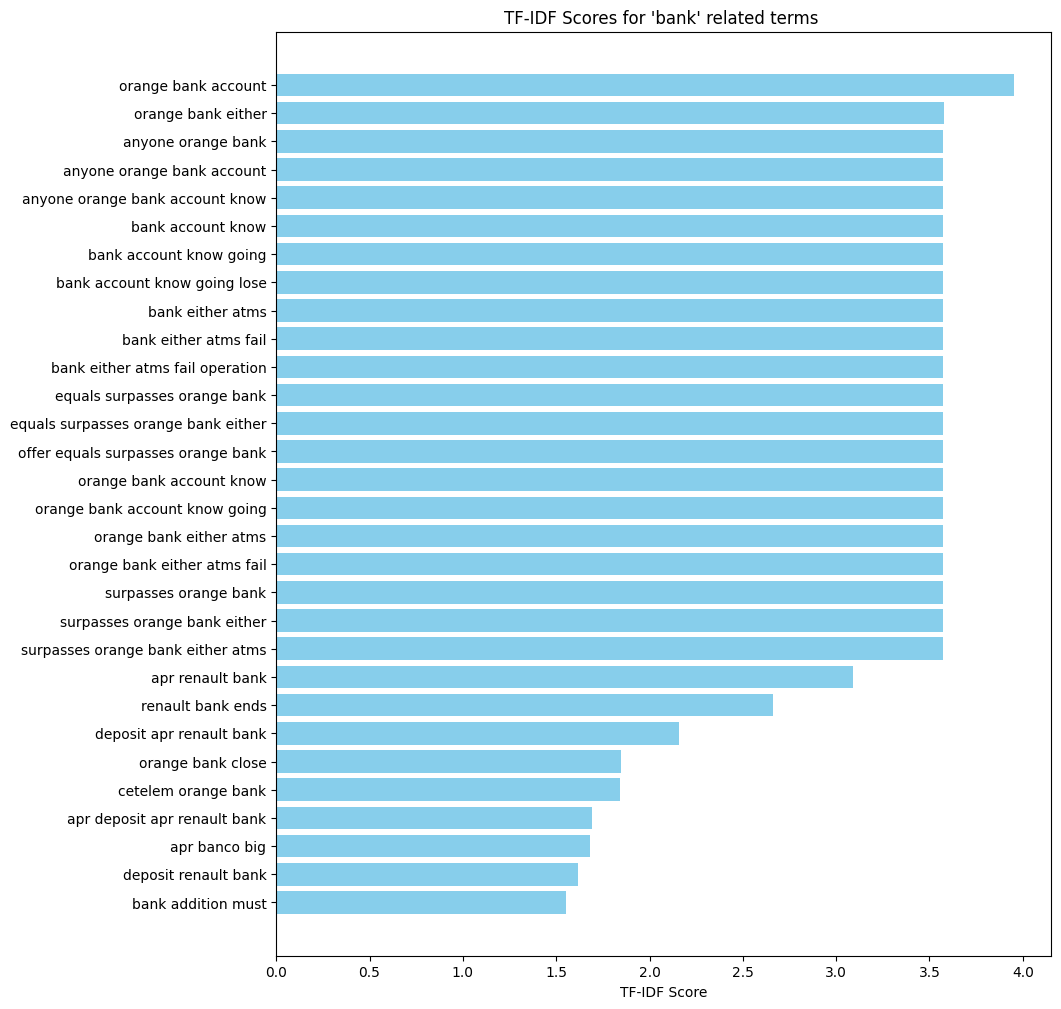

In [19]:
plot_sorted_terms = sorted_terms[:30]
terms, scores = zip(*plot_sorted_terms)

plt.figure(figsize=(10, 12))
plt.barh(terms, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.title('TF-IDF Scores for \'bank\' related terms ')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest scores at the top
plt.show()

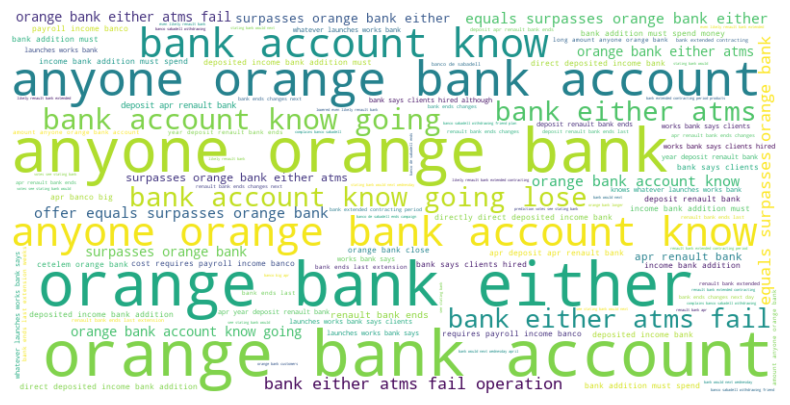

In [20]:
# Converting sorted_terms back to a dictionary
filtered_term_score_dict = dict(sorted_terms)
# Generate the word cloud
wordcloud = WordCloud(
    width = 800, 
    height = 400, 
    background_color = 'white'
).generate_from_frequencies(filtered_term_score_dict)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' for smoother appearance
plt.axis('off')  # No axis to be shown
plt.show()

Total terms before filtering: 385486
Total terms after filtering: 333636


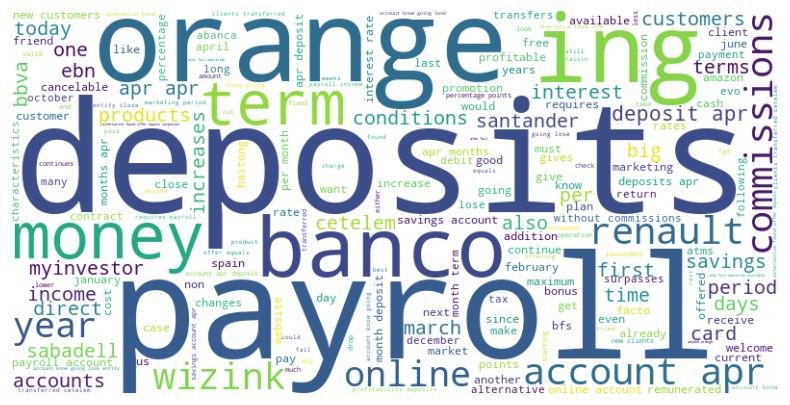

In [21]:
not_bank_filtered_terms = {}

patterns = [
    # Single gram concatenated terms containing "bank" or "banco"
    re.compile(r'\b(?!bank\b|banco\b)\w*(bank|banco)\w*\b'),               
  
    # Bigram patterns
    re.compile(r'\b\w+\s+(bank|banco)\b'),                                   # ... bank or banco
    re.compile(r'\b(bank|banco)\s+\w+\b'),                                   # bank or banco ...
]

# Check each term in the dictionary
for term, score in term_score_dict.items():
    if not(any(pattern.search(term) for pattern in patterns)):
        not_bank_filtered_terms[term] = score

# Print the number of terms before and after filtering
print(f"Total terms before filtering: {len(term_score_dict)}")
print(f"Total terms after filtering: {len(not_bank_filtered_terms)}")

# Sort the filtered terms by score in descending order
not_bank_sorted_terms = sorted(not_bank_filtered_terms.items(), key=lambda x: x[1], reverse=True)

# Generate the word cloud if there are any terms left after filtering
if not_bank_sorted_terms:
    plot_term_score_dict = dict(not_bank_sorted_terms)
    # Generate the word cloud
    wordcloud = WordCloud(
        width = 800, 
        height = 400, 
        background_color = 'white'
    ).generate_from_frequencies(plot_term_score_dict)

    # Displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' for smoother appearance
    plt.axis('off')  # No axis to be shown
    plt.show()
else:
    print("No terms available to generate a word cloud.")

### yearly tf-idf

In [22]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract year from the date
df_cleaned['year'] = df_cleaned['date'].dt.year


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def compute_tfidf_scores(df, patterns):
    # Initialize TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 3), max_df=0.6, min_df=0.005)

    # Fit and transform the cleaned text data
    tfidf_features = tfidf_vectorizer.fit_transform(df['combined_text'])

    # Convert to dense matrix (if needed)
    tfidf_features_dense = tfidf_features.toarray()

    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Sum tf-idf scores for each term
    term_scores = np.sum(tfidf_features_dense, axis=0)

    # Create a dictionary to store terms and their scores
    term_score_dict = {term: score for term, score in zip(feature_names, term_scores)}

    # Dictionary to hold filtered terms
    filtered_terms = {}

    # Check each term in the dictionary
    for term, score in term_score_dict.items():
        # Ensure "bank" or "banco" is standalone
        if any(pattern.match(term) for pattern in patterns) and ('bank' in term.split() or 'banco' in term.split()):
            if score >= 0.5:
                filtered_terms[term] = score

    # Sort the filtered terms by score in descending order
    sorted_terms = sorted(filtered_terms.items(), key=lambda x: x[1], reverse=True)

    return sorted_terms

patterns = [
    # Single gram concatenated terms containing "bank" or "banco"
    re.compile(r'\b(?!bank\b|banco\b)\w*(bank|banco)\w*\b'),               
  
    # Bigram patterns
    #re.compile(r'\b\w+\s+(bank|banco)\b'),                                   # ... bank or banco
    #re.compile(r'\b(bank|banco)\s+\w+\b'),                                   # bank or banco ...
  
    # Trigram patterns
    re.compile(r'\b\w+\s+(bank|banco)\s+\w+\b'),                             # ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\b'),                             # bank or banco ... ...
    re.compile(r'\b\w+\s+\w+\s+(bank|banco)\b'),                             # ... ... bank or banco
  
    # Four-gram patterns
    re.compile(r'\b\w+\s+\w+\s+(bank|banco)\s+\w+\b'),                       # ... ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\s+\w+\b'),                       # bank or banco ... ... ...
    re.compile(r'\b\w+\s+\w+\s+\w+\s+(bank|banco)\b'),                       # ... ... ... bank or banco
  
    # Five-gram patterns
    re.compile(r'\b\w+\s+\w+\s+\w+\s+(bank|banco)\s+\w+\b'),                 # ... ... ... bank or banco ...
    re.compile(r'\b(bank|banco)\s+\w+\s+\w+\s+\w+\s+\w+\b'),                 # bank or banco ... ... ... ...
    re.compile(r'\b\w+\s+\w+\s+\w+\s+\w+\s+(bank|banco)\b')                  # ... ... ... ... bank or banco
]

# Group by year and compute TF-IDF scores for each year
yearly_tfidf_scores = {}
for year, group in df_cleaned.groupby('year'):
    yearly_tfidf_scores[year] = compute_tfidf_scores(group, patterns)


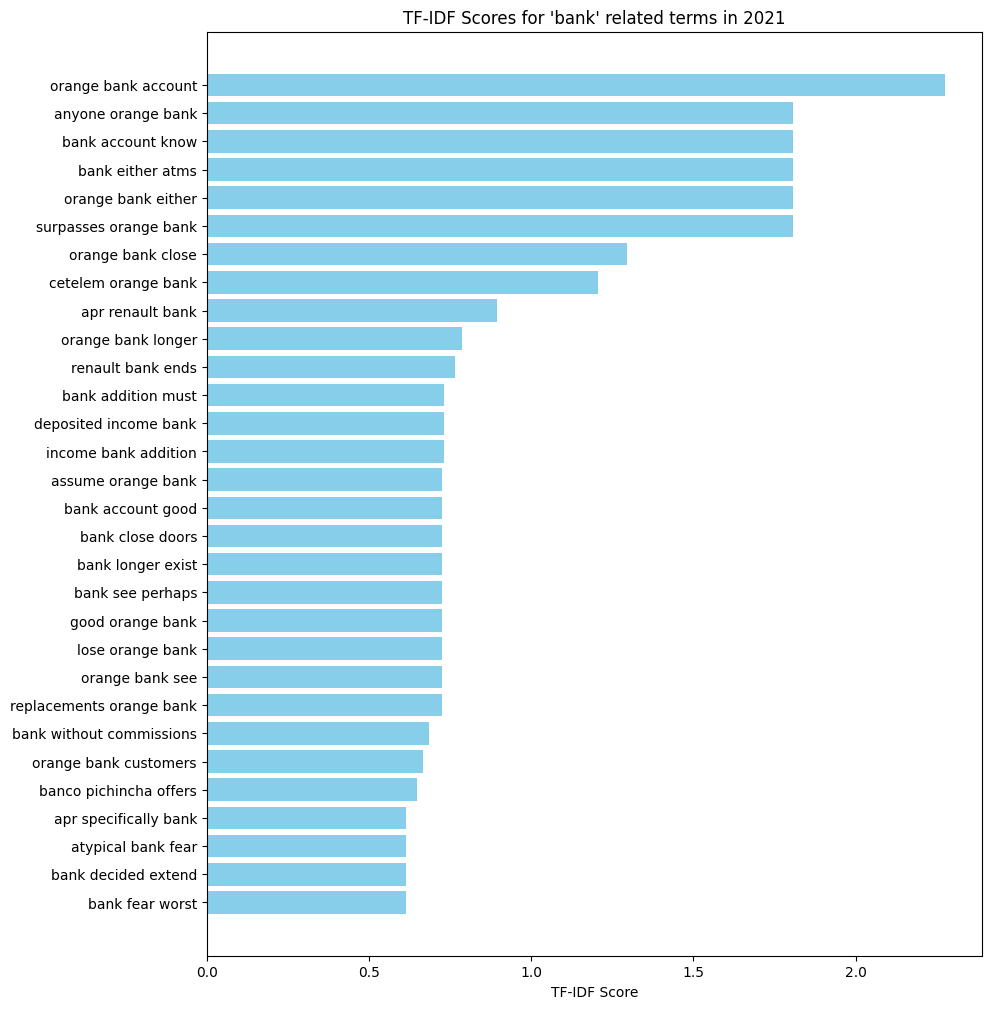

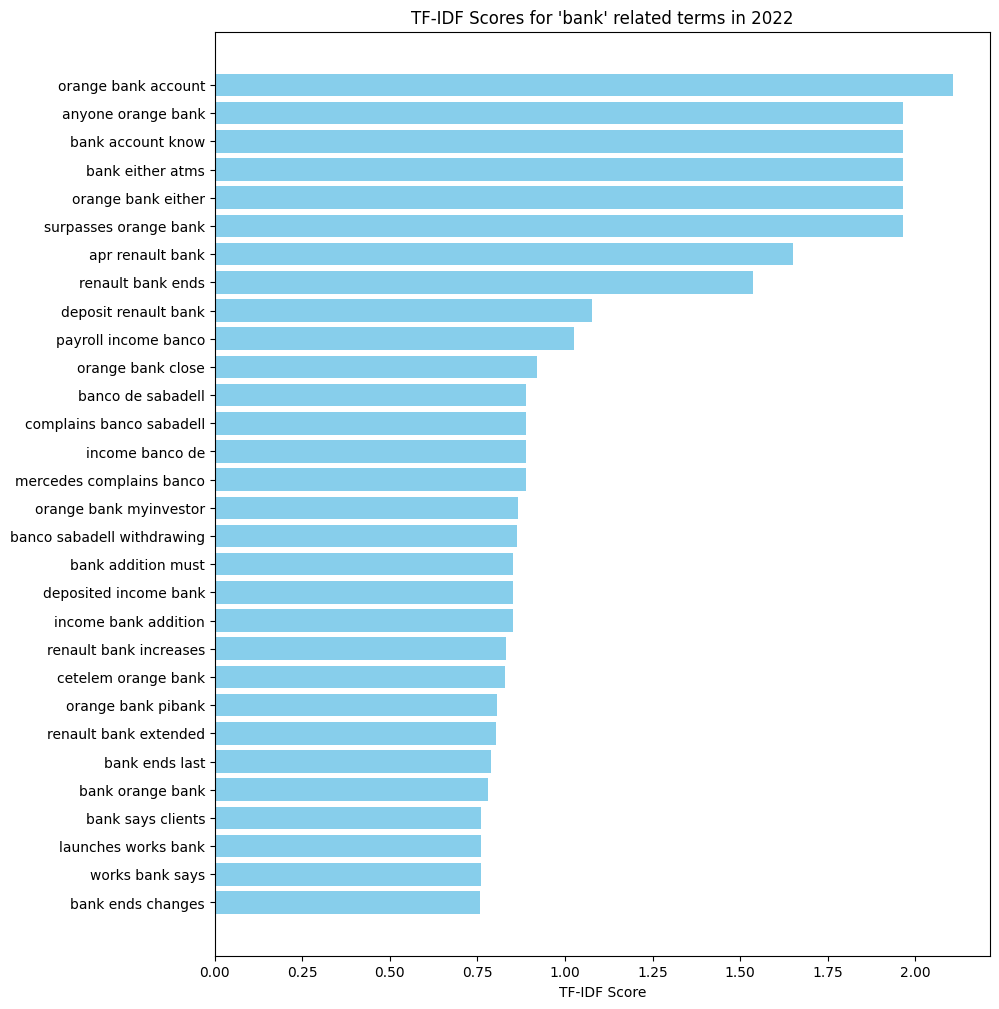

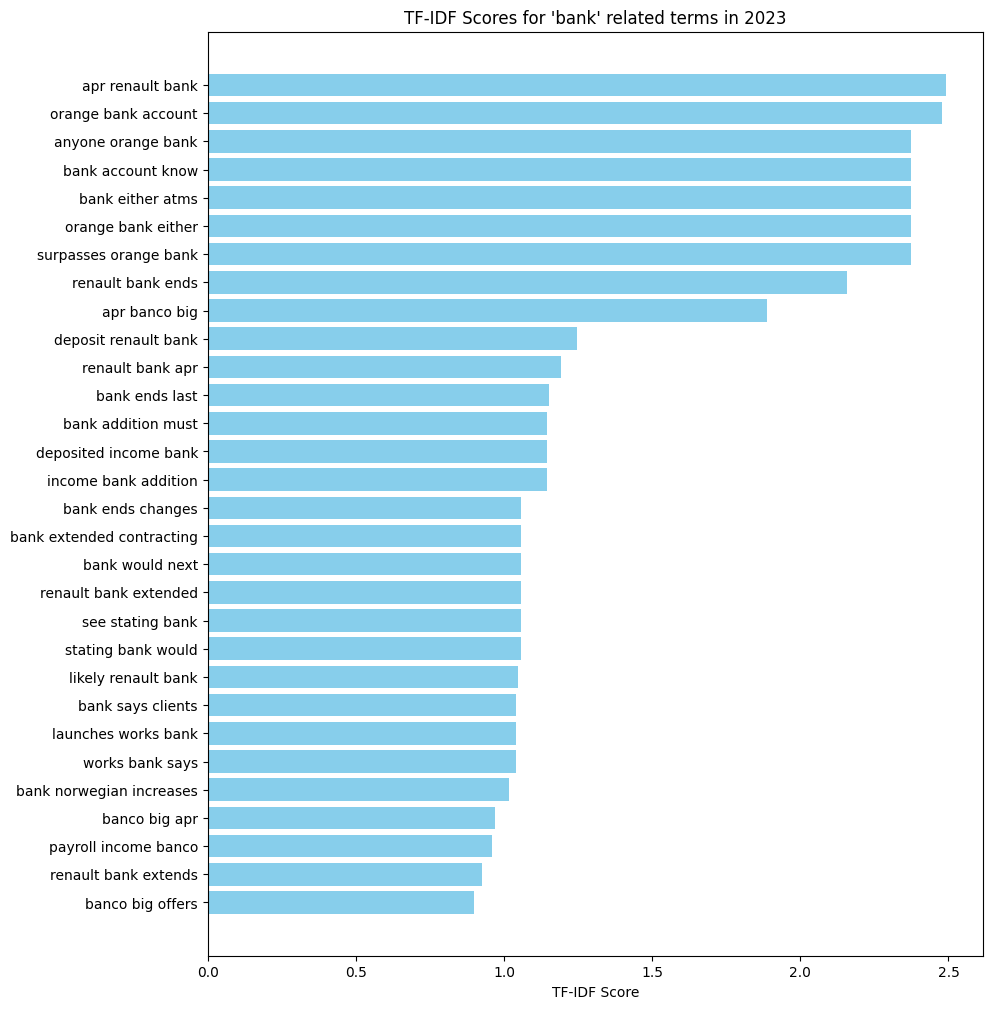

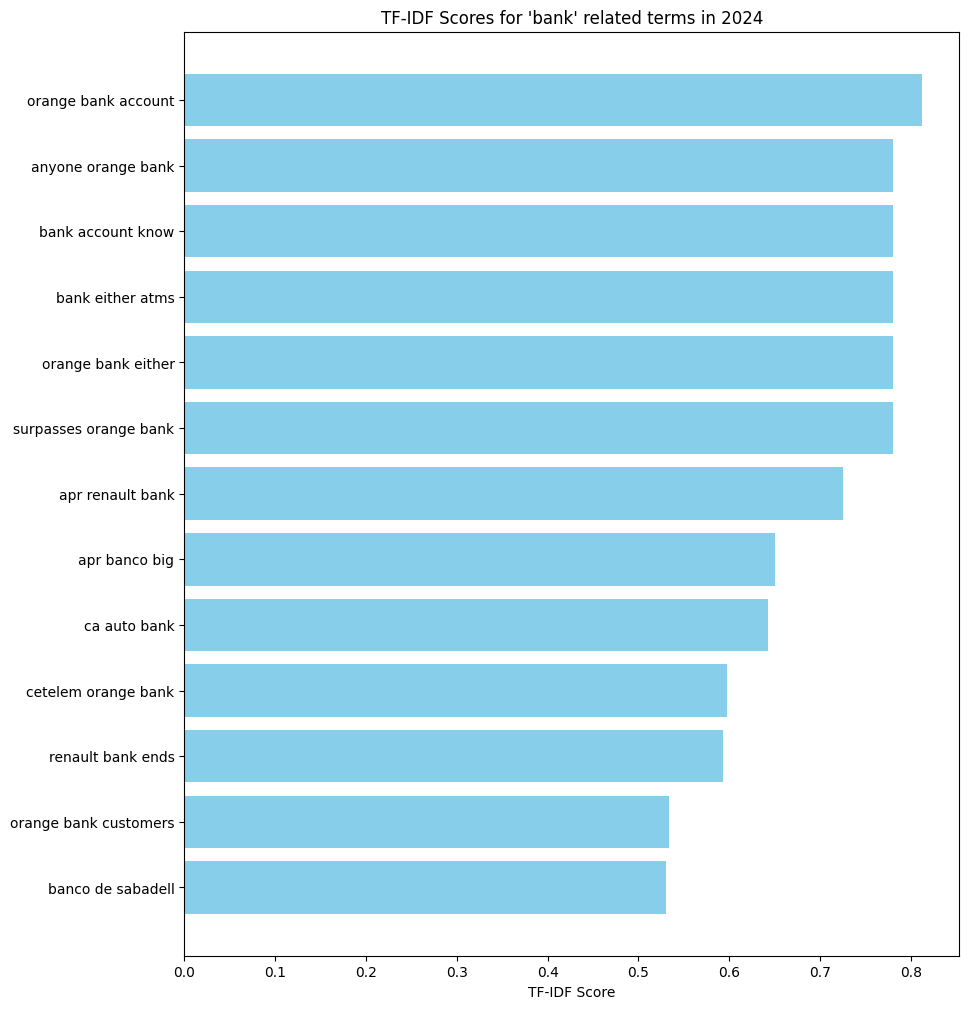

In [24]:
filtered_yearly_tfidf_scores = {year: terms for year, terms in yearly_tfidf_scores.items() if terms}

for year, sorted_terms in filtered_yearly_tfidf_scores.items():
    plot_sorted_terms = sorted_terms[:30]  # Adjust number of terms to plot as needed
    terms, scores = zip(*plot_sorted_terms)

    plt.figure(figsize=(10, 12))
    plt.barh(terms, scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title(f'TF-IDF Scores for \'bank\' related terms in {year}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest scores at the top
    plt.show()

#### LDA - topic modelling

In [25]:
'''from collections.abc import Mapping
from gensim import corpora, models
import pprint
'''

'from collections.abc import Mapping\nfrom gensim import corpora, models\nimport pprint\n'

In [26]:
'''#!pip install gensim
!pip install --use-pep517 gensim==3.8.0
!pip install scipy==1.10.1'''

'#!pip install gensim\n!pip install --use-pep517 gensim==3.8.0\n!pip install scipy==1.10.1'

In [27]:
def tokenizer_for_df(text, mod = 0):
    tokens = tokenize(text, mod)
    return " ".join(tokens)

def load_bar(corpus_data, col, mod = 0):
    # Percentage load bar
    text_preproc = corpus_data[col].astype(str).progress_apply(lambda row: tokenizer_for_df(row, mod))
    corpus_data[col] = text_preproc
    print(f'done with column: {col}')


def tokenizer_for_df_fit(corpus_data, mod = 0):
    # Load with bar and requires a mod value
    load_bar(corpus_data, "combined_text", mod)

    corpus_data = corpus_data.dropna(subset=["combined_text"]).reset_index(drop=True)
    corpus_data = corpus_data[["title", "url", "date", "text", "combined_text", "word_count"]]

    return corpus_data

In [28]:
df_copy = df_cleaned
df_copy = tokenizer_for_df_fit(df_copy,mod = 1)

df_copy.head()

100%|██████████| 1018/1018 [00:01<00:00, 728.18it/s]

done with column: combined_text


title  \
0  Tomorrow, last day of the account at 2.89% APR...   
1  ING gives you up to €120 if you direct your pa...   
2  Banco BIG deposits: slight increase in normal ...   
3  The future of Bitcoin: predictions for the nex...   
4  Eco: Cetelem only allows maximum daily transfe...   

                                                 url       date  \
0  https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1  https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2  https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3  https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4  https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   

                                                text  \
0  Tomorrow, April 24, 2024, the marketing period...   
1  ING now asks, in addition to direct debiting a...   
2  Banco BIG remodels its deposit offer with slig...   
3  Since its launch, Bitcoin has seen positive an...   
4  Due to the disappearance of Orange Bank, and t...   

                                       combined_text  word_count  
0  tomorrow last day account apr deposit apr rena...         318  
1  ing gives direct payroll pay card ing gives di...         400  
2  banco big deposits slight increase normal comb...         476  
3  future bitcoin predictions next years future b...         656  
4  eco cetelem allows maximum daily transfers eco...         450

In [29]:
#pip install "scipy<1.13"

In [30]:
num_topics = 6

def custom_tokenizer_mod_1(text):
    tokens = tokenize(text, modulation=1)
    return tokens

from gensim import corpora, models
import pprint


# Tokenize the documents
tokenized_documents = df_copy['combined_text'].apply(custom_tokenizer_mod_1).tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics= num_topics, id2word=dictionary)

# Print the topics
pprint.pprint(lda_model.print_topics())

[(0,
  '0.056*"apr" + 0.027*"bank" + 0.019*"account" + 0.019*"deposits" + '
  '0.012*"deposit" + 0.012*"month" + 0.012*"offer" + 0.011*"profitability" + '
  '0.010*"new" + 0.010*"clients"'),
 (1,
  '0.033*"bank" + 0.031*"apr" + 0.025*"account" + 0.016*"orange" + '
  '0.012*"clients" + 0.010*"deposit" + 0.010*"new" + 0.009*"money" + '
  '0.009*"payroll" + 0.009*"entity"'),
 (2,
  '0.024*"bank" + 0.022*"account" + 0.021*"apr" + 0.013*"payroll" + '
  '0.010*"offer" + 0.010*"clients" + 0.008*"month" + 0.008*"new" + '
  '0.008*"online" + 0.007*"without"'),
 (3,
  '0.033*"account" + 0.026*"apr" + 0.021*"bank" + 0.014*"offer" + '
  '0.011*"deposit" + 0.011*"payroll" + 0.010*"clients" + 0.009*"new" + '
  '0.009*"deposits" + 0.009*"offers"'),
 (4,
  '0.027*"bank" + 0.020*"account" + 0.019*"apr" + 0.011*"deposit" + '
  '0.009*"clients" + 0.008*"month" + 0.007*"commissions" + 0.007*"ing" + '
  '0.007*"see" + 0.007*"offer"'),
 (5,
  '0.024*"bank" + 0.017*"apr" + 0.012*"account" + 0.010*"deposits" 

##### when we only lower-case and remove digits, interesting part appears, importance of emojs appeared in some topics and even appeared at top6, (9, '0.080*"!" + 0.037*"to" + 0.033*"very" + 0.033*"beautiful" + 0.032*"do" + ' '0.028*"a" + 0.025*"\👍" + 0.025*"nice" + 0.019*"experience" + 0.019*"queues"'). As we didn't remove stop words, too much confusing-information appears.</br>

#### We will use remove stop-words and do stemming for join purpose for next LDA analysis.

In [31]:
# Using get_document_topics with an explicit minimum_probability
doc_topics = [lda_model.get_document_topics(item, minimum_probability=0.0000001) for item in corpus]

#note you could also use this vector = [lda[item] for item in corpus] but this has a higher threshold. 
#I like my topic vectors complete!

#this produces a lits of tuples
print(doc_topics[0])

[(0, 0.12626715), (1, 0.001080124), (2, 0.001077739), (3, 0.0010786434), (4, 0.86941975), (5, 0.001076572)]


We observed that for 1st review, review relevance to most topics are very small, all around than 0.011112. Probably because small topics number, but we should allow this happened, as our reviews number is large but short for each.

In [32]:
topics = lda_model.show_topics(num_topics=-1, num_words=50, formatted=False)
topics

[(0,
  [('apr', 0.056064602),
   ('bank', 0.027315665),
   ('account', 0.01937709),
   ('deposits', 0.0186572),
   ('deposit', 0.012343571),
   ('month', 0.012007134),
   ('offer', 0.011764057),
   ('profitability', 0.011008319),
   ('new', 0.010149534),
   ('clients', 0.009903205),
   ('months', 0.009796134),
   ('banco', 0.009284112),
   ('entity', 0.008450586),
   ('term', 0.008184361),
   ('offers', 0.007860227),
   ('orange', 0.0072407005),
   ('payroll', 0.006913621),
   ('money', 0.006811776),
   ('year', 0.0065642484),
   ('ing', 0.0062450645),
   ('see', 0.005374801),
   ('interest', 0.0052524675),
   ('without', 0.0049962024),
   ('products', 0.0049366015),
   ('savings', 0.0046658185),
   ('big', 0.00438332),
   ('also', 0.004010867),
   ('profitable', 0.0038387824),
   ('commissions', 0.0037685514),
   ('terms', 0.0036312472),
   ('myinvestor', 0.0036017804),
   ('conditions', 0.0035926711),
   ('wizink', 0.003579121),
   ('income', 0.0035432084),
   ('increases', 0.0035248

In [33]:
# Iterate through each topic and its associated terms
detection_term = 'casino'
for topic_num, terms in topics:
    for term, weight in terms:
        if term == detection_term:
            print(f"Topic {topic_num} contains the term '{detection_term}' with weight {weight}")

In [34]:
# Iterate through each topic and its associated terms
detection_term = 'bitcoin'
for topic_num, terms in topics:
    for term, weight in terms:
        if term == detection_term:
            print(f"Topic {topic_num} contains the term '{detection_term}' with weight {weight}")

Topic 5 contains the term 'bitcoin' with weight 0.00495977932587266


In [35]:
# Iterate through each topic and its associated terms
detection_term = 'forex'
for topic_num, terms in topics:
    for term, weight in terms:
        if term == detection_term:
            print(f"Topic {topic_num} contains the term '{detection_term}' with weight {weight}")

In [36]:
#!pip install emojis

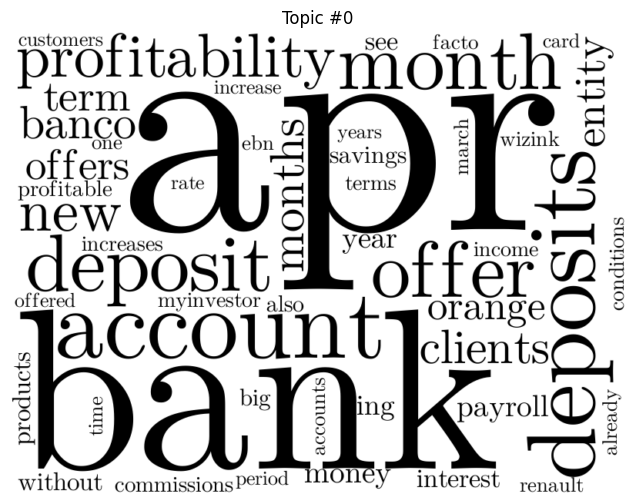

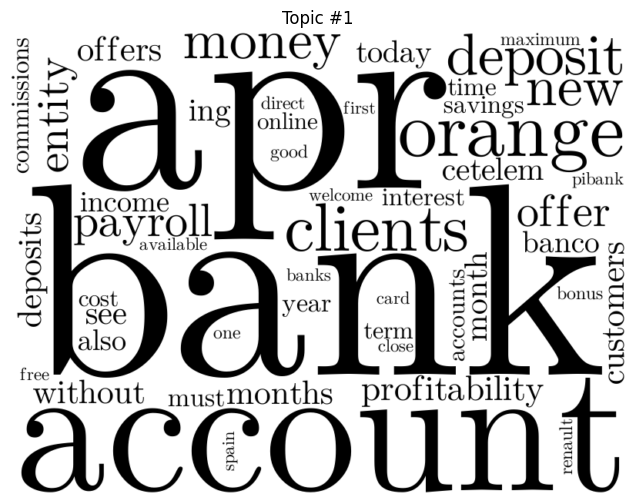

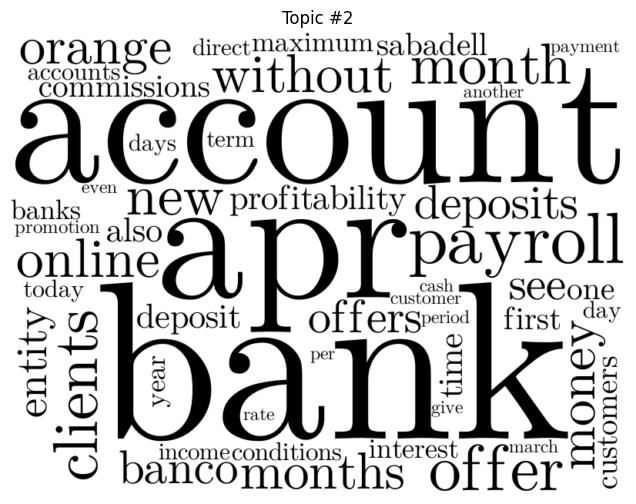

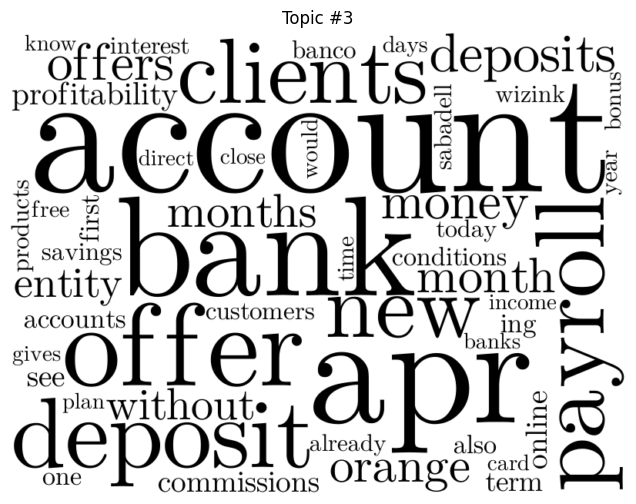

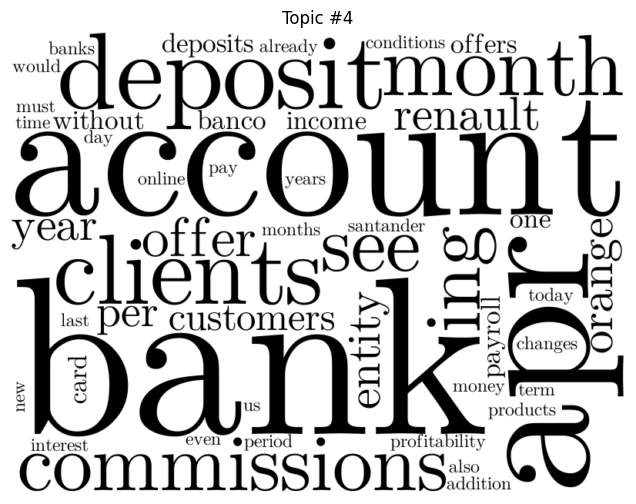

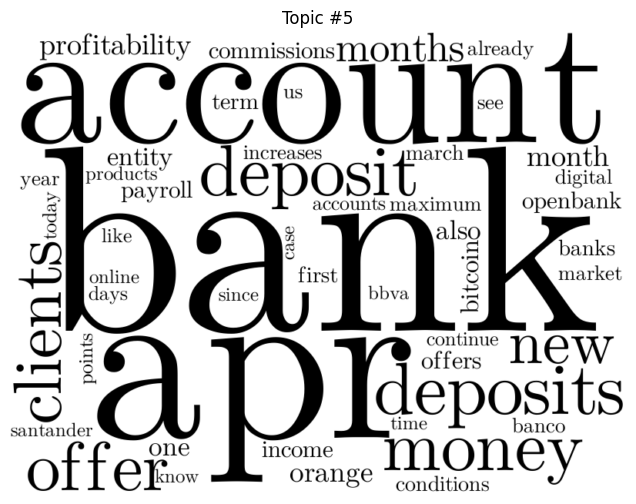

In [37]:
from wordcloud import WordCloud
import emojis

# Define a font path that supports emojis
font_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/github_thesis/deloitte_digital_banking/tucapital_scraper/emoj_Symbola/Symbola.otf'

def generate_wordclouds(topics, dictionary,font_path):
    for topic_num, topic_words in topics:
        word_freq = dict(topic_words)
        wordcloud = WordCloud(
            width=800,
            height=600,
            background_color='white',
            color_func=lambda *args, **kwargs: "black",  # Default color for non-emojis
            font_path=font_path,  # Specify emoji support
            min_font_size=10,
            regexp=r"\S+",  # Regular expression to include all non-whitespace characters
        ).generate_from_frequencies(word_freq)
        
        # Define a custom color function for emojis
        def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
            if word in emojis.UNICODE_EMOJI:  # Check if the word is an emoji
                return "lightblue"  # Set color for emojis
            else:
                return "black"  # Default color for non-emojis
        
        # Apply the custom color function
        wordcloud.color_func = color_func
        
        plt.figure(figsize=(8, 6), facecolor=None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'Topic #{topic_num}')
        plt.show()

# Generate word clouds for each topic
generate_wordclouds(topics, lda_model.id2word,font_path)

In [38]:
def custom_tokenizer_mod_1(text):
    tokens = tokenize(text, modulation=1)
    return tokens

from gensim import corpora, models
import pprint

# Tokenize the documents
tokenized_documents_mod1 = df_copy['combined_text'].apply(custom_tokenizer_mod_1).tolist()

# Create dictionary and corpus
dictionary_mod1 = corpora.Dictionary(tokenized_documents_mod1)
corpus_mod1 = [dictionary_mod1.doc2bow(doc) for doc in tokenized_documents_mod1]

# Train the LDA model
lda_model_mod1_topics_5 = models.LdaModel(corpus_mod1, num_topics= num_topics, id2word=dictionary_mod1)

# Print the topics
pprint.pprint(lda_model_mod1_topics_5.print_topics())

[(0,
  '0.029*"apr" + 0.023*"account" + 0.022*"bank" + 0.016*"deposits" + '
  '0.011*"profitability" + 0.011*"offer" + 0.009*"month" + 0.009*"offers" + '
  '0.009*"payroll" + 0.008*"see"'),
 (1,
  '0.038*"apr" + 0.028*"account" + 0.025*"bank" + 0.015*"clients" + '
  '0.014*"payroll" + 0.011*"new" + 0.010*"month" + 0.009*"money" + 0.009*"ing" '
  '+ 0.009*"deposits"'),
 (2,
  '0.028*"bank" + 0.022*"apr" + 0.022*"account" + 0.014*"offer" + '
  '0.013*"orange" + 0.012*"payroll" + 0.010*"clients" + 0.008*"new" + '
  '0.008*"see" + 0.007*"offers"'),
 (3,
  '0.028*"bank" + 0.022*"apr" + 0.019*"account" + 0.012*"deposit" + '
  '0.011*"orange" + 0.010*"clients" + 0.010*"money" + 0.010*"offer" + '
  '0.008*"payroll" + 0.007*"ing"'),
 (4,
  '0.051*"apr" + 0.027*"bank" + 0.025*"account" + 0.019*"deposit" + '
  '0.012*"deposits" + 0.012*"offer" + 0.011*"month" + 0.009*"new" + '
  '0.009*"profitability" + 0.008*"entity"'),
 (5,
  '0.032*"bank" + 0.029*"apr" + 0.020*"account" + 0.014*"deposits" + '


### when we remove stop words and do stemming, importance of emojs in each topics is decreased and less than words. But, after removing stop words and do stemming, tokens in each topics give a better explanation

In [39]:
# Using get_document_topics with an explicit minimum_probability
doc_topics_mod1 = [lda_model_mod1_topics_5.get_document_topics(item, minimum_probability=0.0000001) for item in corpus_mod1]

#note you could also use this vector = [lda[item] for item in corpus] but this has a higher threshold. 
#I like my topic vectors complete!

#this produces a lits of tuples
print(doc_topics_mod1[0])

[(0, 0.0010776268), (1, 0.0010772613), (2, 0.0010764663), (3, 0.0010773231), (4, 0.9946129), (5, 0.0010784998)]


In [40]:
topics_mod1 = lda_model_mod1_topics_5.show_topics(num_topics=-1, num_words=50, formatted=False)
topics_mod1

[(0,
  [('apr', 0.028774412),
   ('account', 0.022777848),
   ('bank', 0.022084104),
   ('deposits', 0.015625391),
   ('profitability', 0.011114139),
   ('offer', 0.010950641),
   ('month', 0.009142956),
   ('offers', 0.008960028),
   ('payroll', 0.008613193),
   ('see', 0.008029604),
   ('clients', 0.0077568563),
   ('interest', 0.0073127835),
   ('deposit', 0.0071143527),
   ('term', 0.0070851385),
   ('new', 0.0068191355),
   ('entity', 0.0066377646),
   ('months', 0.006598839),
   ('banco', 0.0065661813),
   ('year', 0.0055732545),
   ('money', 0.00493856),
   ('maximum', 0.0049356716),
   ('days', 0.0046978956),
   ('also', 0.0046759397),
   ('without', 0.004136548),
   ('first', 0.0040172026),
   ('products', 0.0039817668),
   ('time', 0.003879777),
   ('banks', 0.0038623267),
   ('commissions', 0.0037106075),
   ('myinvestor', 0.003458579),
   ('years', 0.0034277805),
   ('orange', 0.0033436762),
   ('online', 0.0033158597),
   ('income', 0.0033133035),
   ('period', 0.003230976

               0          1          2          3          4          5
2024   57.975093  39.561913   8.608926   6.001238  15.137741   3.715089
2023  166.372418  65.945495  25.356680  33.387531  21.171059  11.766818
2022   89.564816  68.499226  21.317783  35.534348  23.791930  15.291898
2021   65.443929  60.946814  50.462635  43.465682  75.744584   9.936357
2020    1.248245   0.039224   0.155975   0.555267   0.999131   0.002158


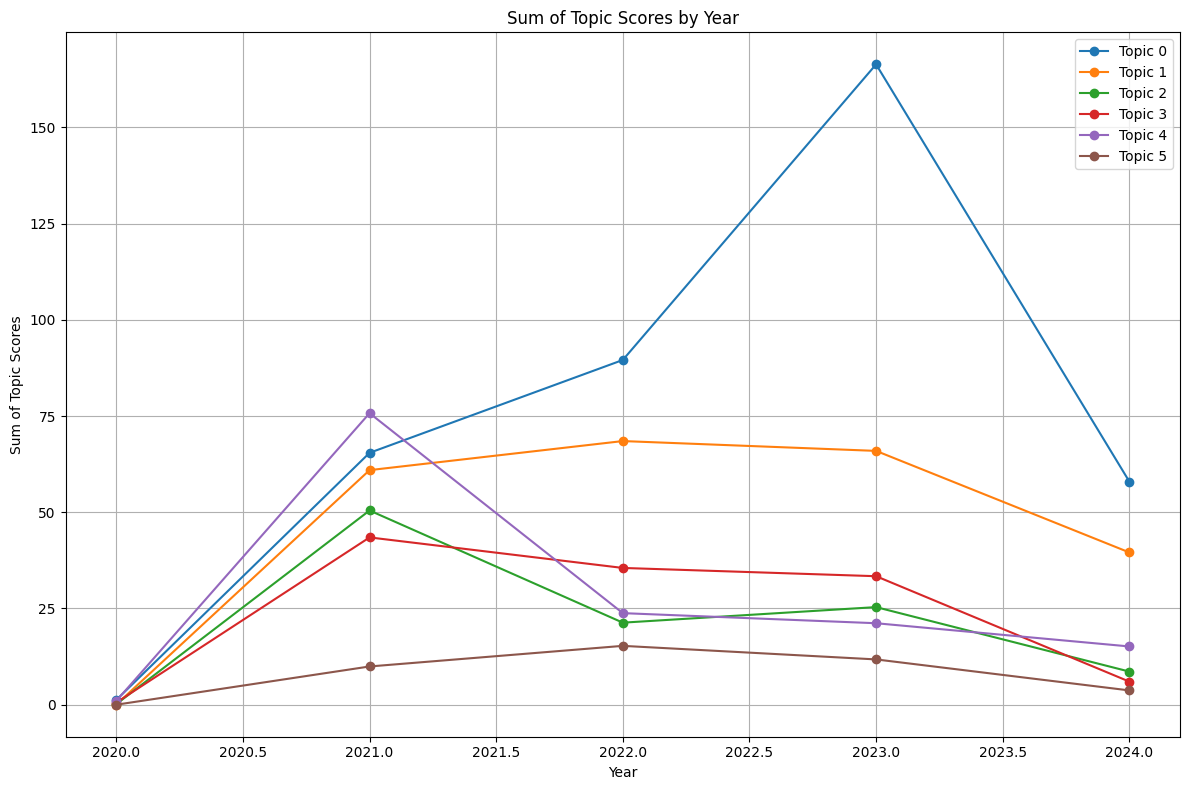

In [41]:
from collections import defaultdict
# Add a column for the year
df_copy['year'] = df_copy['date'].dt.year

# Initialize a dictionary to hold the sum of topic scores for each year
topic_scores_by_year = defaultdict(lambda: defaultdict(float))

# Sum the topic scores for each document by year
for i, doc in enumerate(doc_topics):
    year = df_copy.iloc[i]['year']
    for topic, score in doc:
        topic_scores_by_year[year][topic] += score

# Convert the dictionary to a DataFrame for easier analysis and visualization
topic_scores_df = pd.DataFrame(topic_scores_by_year).T

# Print the topic scores by year
print(topic_scores_df)

# Plot the topic scores by year
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for topic in topic_scores_df.columns:
    plt.plot(topic_scores_df.index, topic_scores_df[topic], marker='o', label=f'Topic {topic}')

plt.title('Sum of Topic Scores by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Topic Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
df_copy['topic_scores'] = doc_topics

'''
# Display the topic scores for each article
for index, row in df_copy.iterrows():
    print(f"Article {index + 1}: {row['title']}")
    for topic, score in row['topic_scores']:
        print(f"    Topic {topic}: {score}")'''

'\n# Display the topic scores for each article\nfor index, row in df_copy.iterrows():\n    print(f"Article {index + 1}: {row[\'title\']}")\n    for topic, score in row[\'topic_scores\']:\n        print(f"    Topic {topic}: {score}")'

In [43]:
# Determine the dominant topic for each article and store it in a new column
df_copy['dominant_topic'] = df_copy['topic_scores'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])

# Display the topic scores and dominant topic for each article
for index, row in df_copy.iterrows():
    print(f"Article {index + 1}: {row['title']}")
    for topic, score in row['topic_scores']:
        print(f"    Topic {topic}: {score}")
    print(f"    Dominant Topic: {row['dominant_topic']}")

# Print the DataFrame with the dominant topic for each article
print(df_copy[['title', 'dominant_topic']])

Article 1: Tomorrow, last day of the account at 2.89% APR and deposit at 3.44% APR from Renault Bank
    Topic 0: 0.12626715004444122
    Topic 1: 0.0010801240568980575
    Topic 2: 0.001077739056199789
    Topic 3: 0.0010786433704197407
    Topic 4: 0.8694197535514832
    Topic 5: 0.001076571992598474
    Dominant Topic: 4
Article 2: ING gives you up to €120 if you direct your payroll and pay with their card
    Topic 0: 0.04748564586043358
    Topic 1: 0.9425119757652283
    Topic 2: 0.0010019942419603467
    Topic 3: 0.001003099256195128
    Topic 4: 0.006996943615376949
    Topic 5: 0.0010003277566283941
    Dominant Topic: 1
Article 3: Banco BIG deposits: slight increase in normal and combined deposits 5.06% APR
    Topic 0: 0.9964971542358398
    Topic 1: 0.0007009481778368354
    Topic 2: 0.0007003473583608866
    Topic 3: 0.0007007913663983345
    Topic 4: 0.0007006186642684042
    Topic 5: 0.0007001328049227595
    Dominant Topic: 0
Article 4: The future of Bitcoin: prediction

                 0          1          2         3          4         5
2024-04   8.646887  11.748401   2.076855  0.751315   4.043099  1.733443
2024-03   7.977824   8.164131   2.559730  3.857079   5.263551  0.177684
2024-02  22.655673   9.989678   3.433644  0.535299   2.688225  1.697480
2024-01  18.694709   9.659702   0.538697  0.857544   3.142866  0.106482
2023-12  10.703631   5.466461   2.075637  1.509598   1.283683  1.960991
2023-11  13.985089  11.692371   2.414006  5.554003   1.846302  0.508229
2023-10  16.473666   7.127068   2.244663  4.690007   1.793034  2.671562
2023-09  16.871416   4.489072   2.281946  3.427034   3.244147  1.686385
2023-08  11.226276   3.591231   2.590418  3.173888   1.115574  0.302614
2023-07   9.110154   5.412571   2.273797  2.142919   0.966365  0.094194
2023-06  13.535095   3.376538   2.252652  1.572727   1.248760  2.014228
2023-05  22.008329   3.566604   1.404387  5.730041   1.953433  0.337206
2023-04  11.503356   2.454650   1.393137  2.204284   1.591961  0

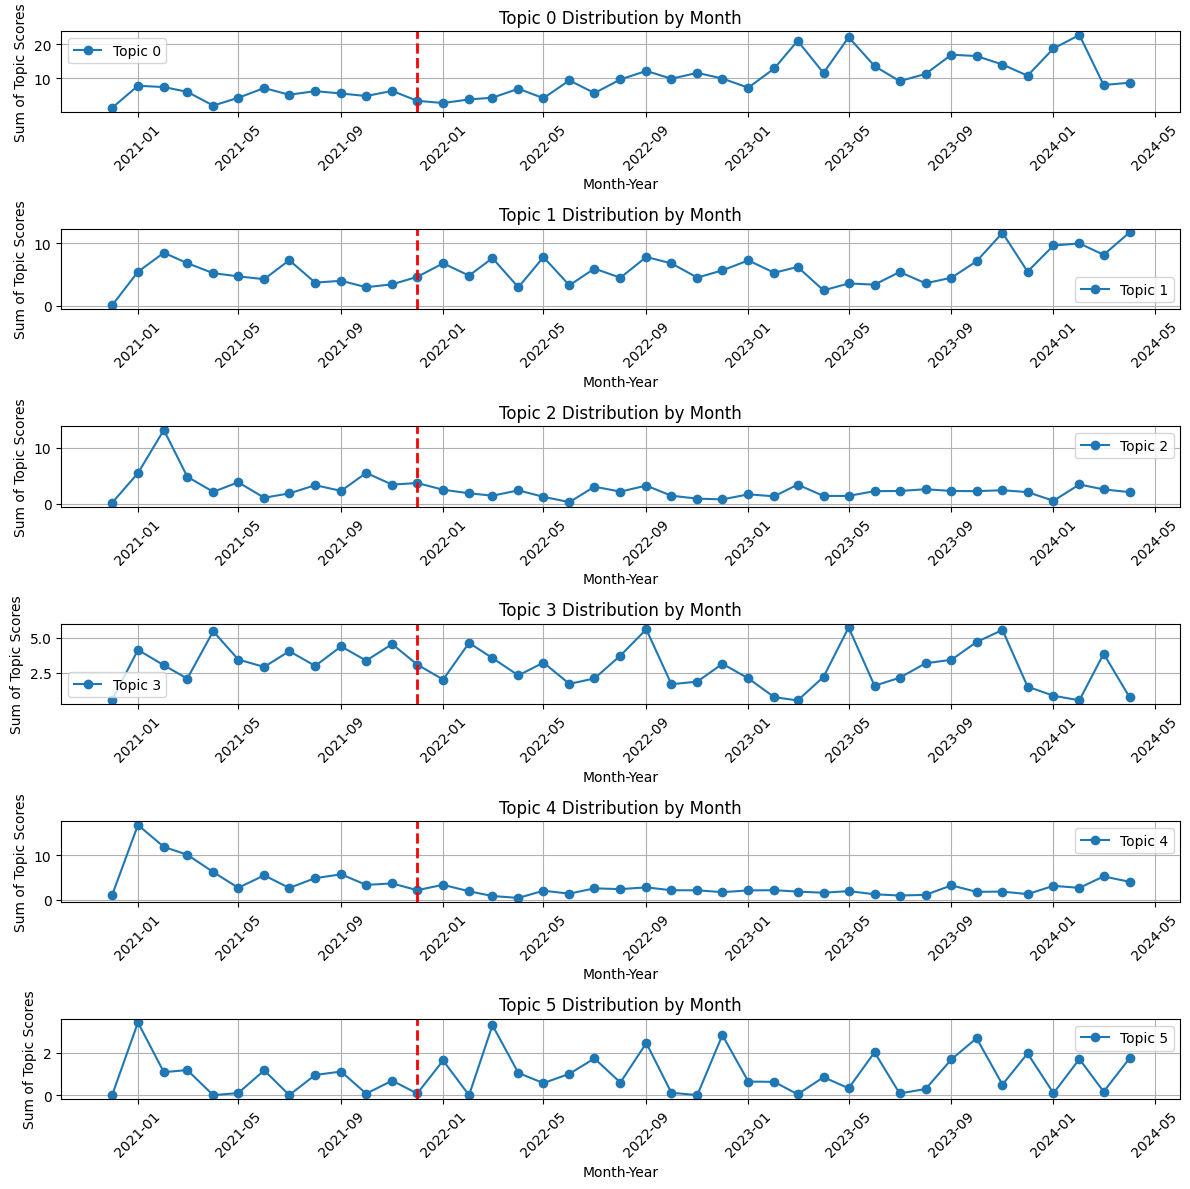

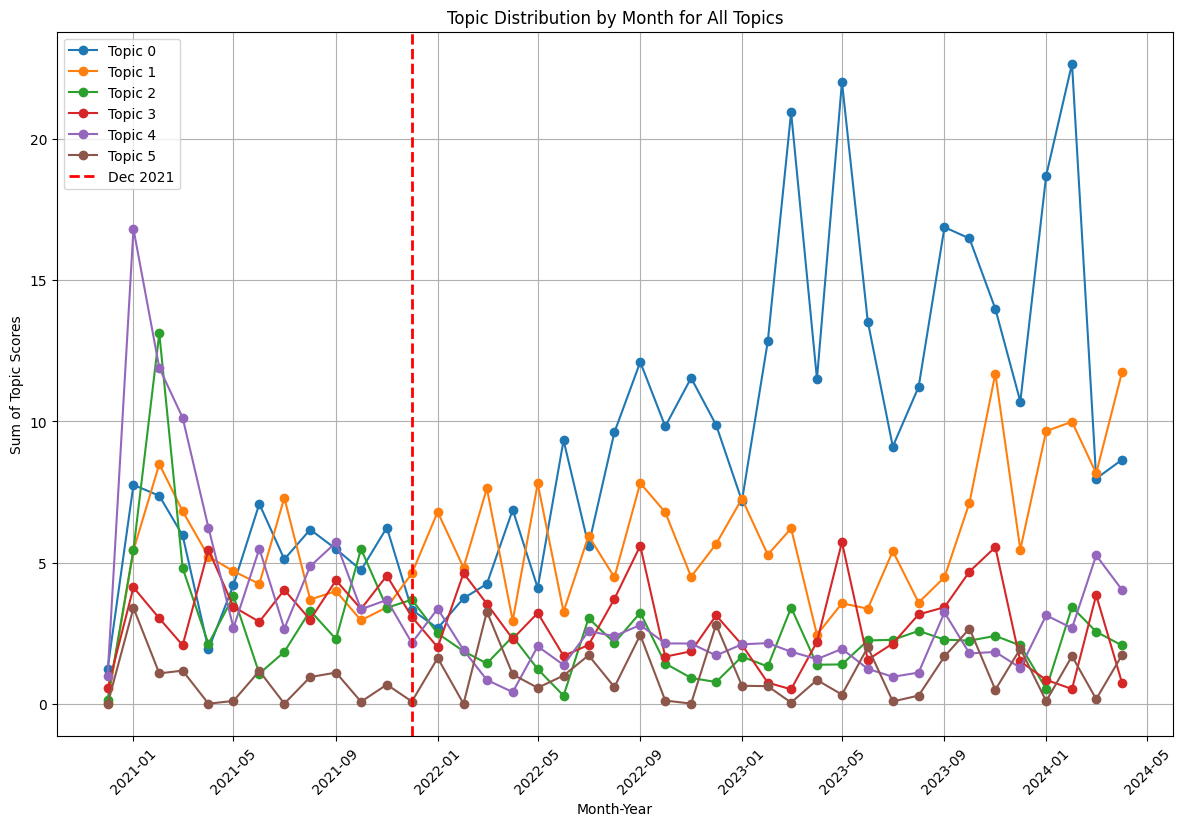

In [44]:
from collections import defaultdict

# Ensure date is in datetime format
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Convert date to month-year format
df_copy['month_year'] = df_copy['date'].dt.to_period('M')

# Initialize a dictionary to hold the sum of topic scores for each month-year
topic_scores_by_month = defaultdict(lambda: defaultdict(float))

# Sum the topic scores for each document by month-year
for i, doc in enumerate(doc_topics):
    month_year = df_copy.iloc[i]['month_year']
    for topic, score in doc:
        topic_scores_by_month[month_year][topic] += score

# Convert the dictionary to a DataFrame for easier analysis and visualization
topic_scores_month_df = pd.DataFrame(topic_scores_by_month).T

# Print the topic scores by month-year
print(topic_scores_month_df)

# Plot the topic scores by month-year for each topic
fig, axs = plt.subplots(len(topic_scores_month_df.columns), 1, figsize=(12, 2 * len(topic_scores_month_df.columns)), tight_layout=True)

for i, topic in enumerate(topic_scores_month_df.columns):
    axs[i].plot(topic_scores_month_df.index.to_timestamp(), topic_scores_month_df[topic], marker='o', label=f'Topic {topic}')
    axs[i].set_title(f'Topic {topic} Distribution by Month')
    axs[i].set_xlabel('Month-Year')
    axs[i].set_ylabel('Sum of Topic Scores')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].axvline(pd.Timestamp('2021-12-01'), color='red', linestyle='--', linewidth=2, label='Dec 2021')
    axs[i].xaxis.set_tick_params(rotation=45)

# Show the individual plots
plt.show()

# Plot all topics together in one plot
plt.figure(figsize=(12, 8))
for topic in topic_scores_month_df.columns:
    plt.plot(topic_scores_month_df.index.to_timestamp(), topic_scores_month_df[topic], marker='o', label=f'Topic {topic}')

plt.axvline(pd.Timestamp('2021-12-01'), color='red', linestyle='--', linewidth=2, label='Dec 2021')

plt.title('Topic Distribution by Month for All Topics')
plt.xlabel('Month-Year')
plt.ylabel('Sum of Topic Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

            4     1     0    5     2    3
2024-04   5.0  12.0   8.0  2.0   2.0  NaN
2024-03   6.0   8.0   6.0  NaN   3.0  5.0
2024-02   2.0  11.0  23.0  1.0   4.0  NaN
2024-01   3.0  12.0  18.0  NaN   NaN  NaN
2023-12   2.0   6.0   9.0  3.0   2.0  1.0
2023-11   1.0  13.0  14.0  NaN   2.0  6.0
2023-10   2.0   8.0  15.0  3.0   2.0  5.0
2023-09   4.0   4.0  17.0  1.0   3.0  3.0
2023-08   2.0   4.0  11.0  NaN   3.0  2.0
2023-07   NaN   7.0   9.0  NaN   2.0  2.0
2023-06   NaN   4.0  15.0  2.0   2.0  1.0
2023-05   2.0   2.0  22.0  NaN   2.0  7.0
2023-04   1.0   3.0  12.0  1.0   1.0  2.0
2023-03   3.0   7.0  20.0  NaN   3.0  NaN
2023-02   3.0   6.0  12.0  NaN   2.0  NaN
2023-01   3.0   8.0   5.0  NaN   2.0  3.0
2022-12   2.0   6.0   9.0  3.0   1.0  3.0
2022-11   3.0   4.0  10.0  NaN   1.0  3.0
2022-10   3.0   7.0   9.0  NaN   1.0  2.0
2022-09   2.0  11.0  11.0  3.0   3.0  4.0
2022-08   3.0   5.0  11.0  1.0   1.0  2.0
2022-07   2.0   8.0   5.0  2.0   2.0  2.0
2022-06   1.0   4.0  10.0  1.0   N

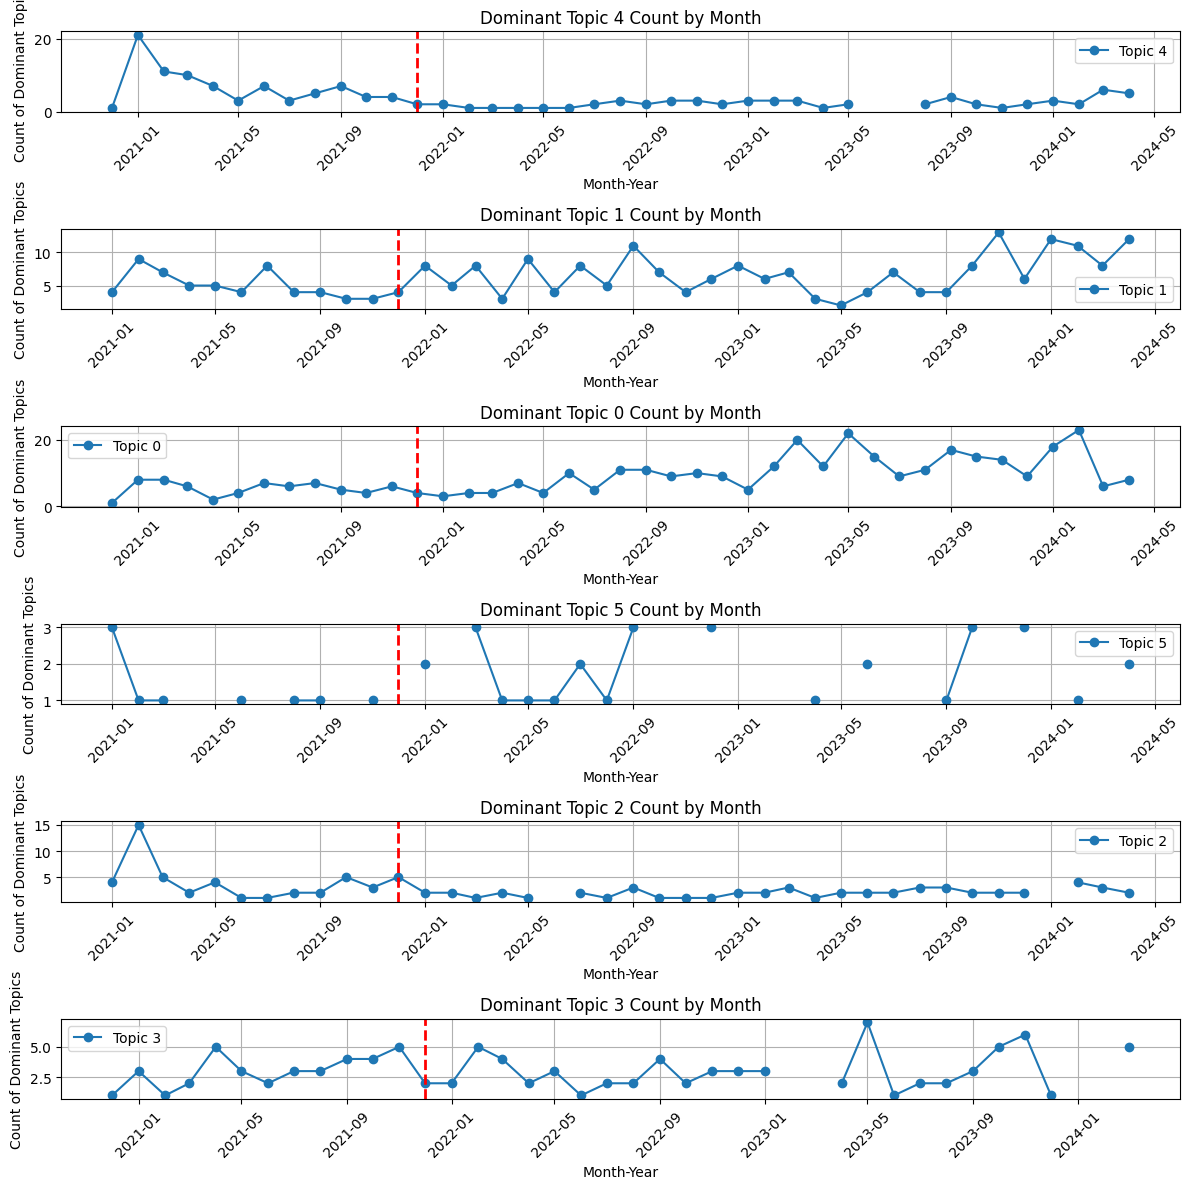

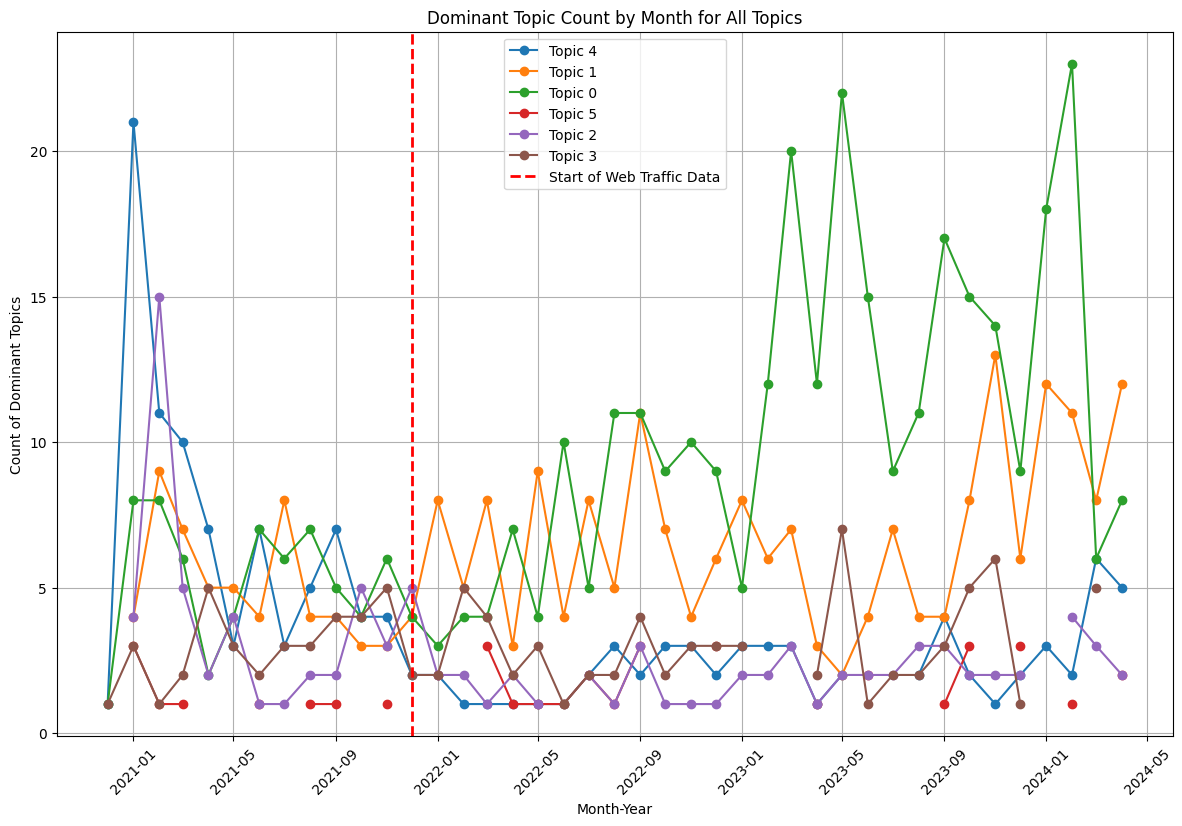

In [45]:
from collections import defaultdict

# Ensure date is in datetime format
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Convert date to month-year format
df_copy['month_year'] = df_copy['date'].dt.to_period('M')

# Determine the dominant topic for each article and store it in a new column
df_copy['dominant_topic'] = df_copy['topic_scores'].apply(lambda topics: max(topics, key=lambda x: x[1])[0])

# Initialize a dictionary to hold the count of dominant topics for each month-year
dominant_topic_counts_by_month = defaultdict(lambda: defaultdict(int))

# Count the dominant topics for each document by month-year
for i, row in df_copy.iterrows():
    month_year = row['month_year']
    dominant_topic = row['dominant_topic']
    dominant_topic_counts_by_month[month_year][dominant_topic] += 1

# Convert the dictionary to a DataFrame for easier analysis and visualization
dominant_topic_counts_month_df = pd.DataFrame(dominant_topic_counts_by_month).T

# Print the dominant topic counts by month-year
print(dominant_topic_counts_month_df)

# Plot the dominant topic counts by month-year for each topic
fig, axs = plt.subplots(len(dominant_topic_counts_month_df.columns), 1, figsize=(12, 2 * len(dominant_topic_counts_month_df.columns)), tight_layout=True)

for i, topic in enumerate(dominant_topic_counts_month_df.columns):
    axs[i].plot(dominant_topic_counts_month_df.index.to_timestamp(), dominant_topic_counts_month_df[topic], marker='o', label=f'Topic {topic}')
    axs[i].set_title(f'Dominant Topic {topic} Count by Month')
    axs[i].set_xlabel('Month-Year')
    axs[i].set_ylabel('Count of Dominant Topics')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].axvline(x=pd.Timestamp('2021-12-01'), color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')
    axs[i].xaxis.set_tick_params(rotation=45)

# Show the individual plots
plt.show()

# Plot all dominant topics together in one plot
plt.figure(figsize=(12, 8))
for topic in dominant_topic_counts_month_df.columns:
    plt.plot(dominant_topic_counts_month_df.index.to_timestamp(), dominant_topic_counts_month_df[topic], marker='o', label=f'Topic {topic}')

plt.axvline(x=pd.Timestamp('2021-12-01'), color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')
plt.title('Dominant Topic Count by Month for All Topics')
plt.xlabel('Month-Year')
plt.ylabel('Count of Dominant Topics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

               0          1          2          3          4          5
2024   57.975093  39.561913   8.608926   6.001238  15.137741   3.715089
2023  166.372418  65.945495  25.356680  33.387531  21.171059  11.766818
2022   89.564816  68.499226  21.317783  35.534348  23.791930  15.291898
2021   65.443929  60.946814  50.462635  43.465682  75.744584   9.936357
2020    1.248245   0.039224   0.155975   0.555267   0.999131   0.002158


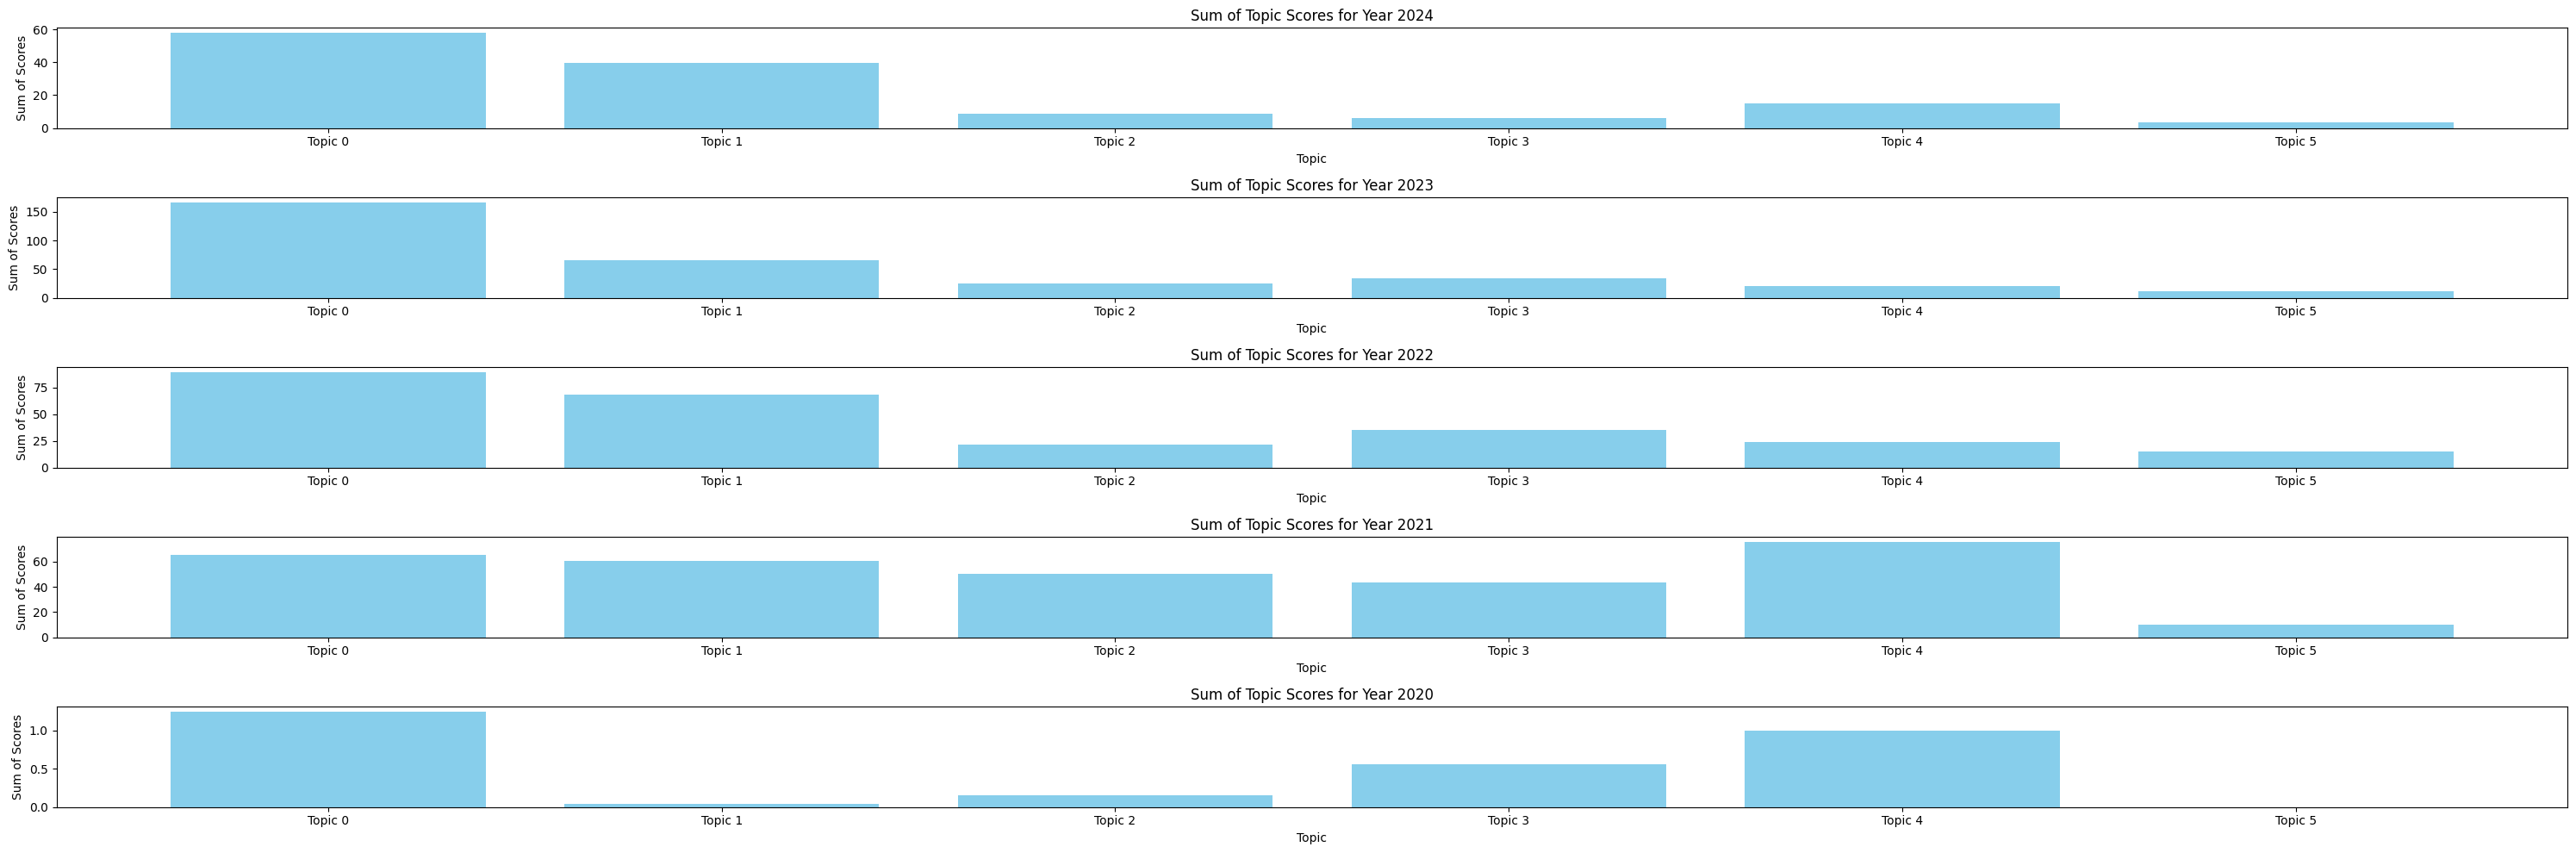

In [46]:
# Add a column for the year
df_copy['year'] = df_copy['date'].dt.year

# Initialize a dictionary to hold the sum of topic scores for each year
topic_scores_by_year = defaultdict(lambda: defaultdict(float))

# Sum the topic scores for each document by year
for i, doc in enumerate(doc_topics):
    year = df_copy.iloc[i]['year']
    for topic, score in doc:
        topic_scores_by_year[year][topic] += score

# Convert the dictionary to a DataFrame for easier analysis and visualization
topic_scores_df = pd.DataFrame(topic_scores_by_year).T

# Print the topic scores by year
print(topic_scores_df)

# Plot the topic scores by year using bar plots
years = topic_scores_df.index
num_topics = len(topic_scores_df.columns)

plt.figure(figsize=(30, 10))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i + 1)
    plt.bar(range(num_topics), topic_scores_df.loc[year], color='skyblue')
    plt.title(f'Sum of Topic Scores for Year {year}')
    plt.xlabel('Topic')
    plt.ylabel('Sum of Scores')
    plt.xticks(range(num_topics), [f'Topic {j}' for j in range(num_topics)])
    plt.tight_layout()

plt.show()

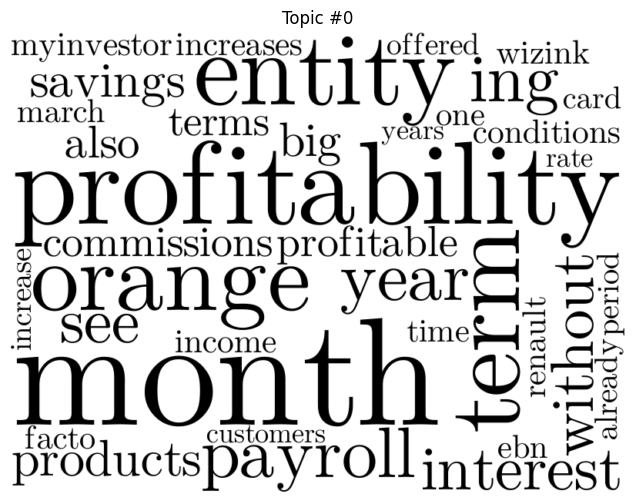

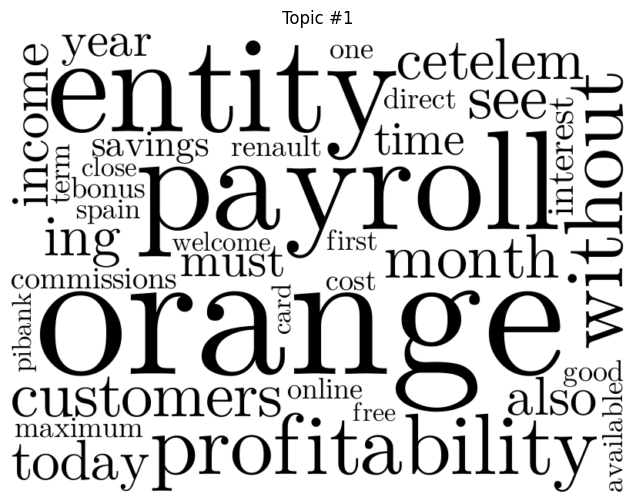

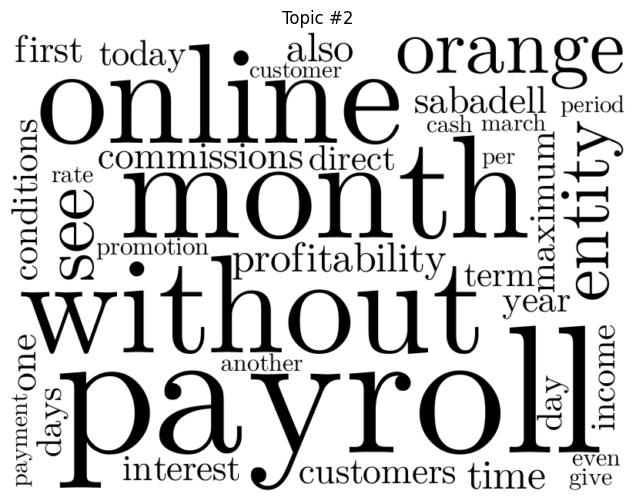

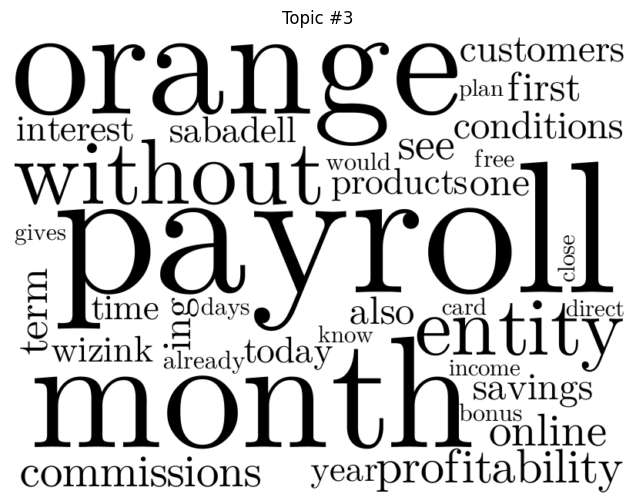

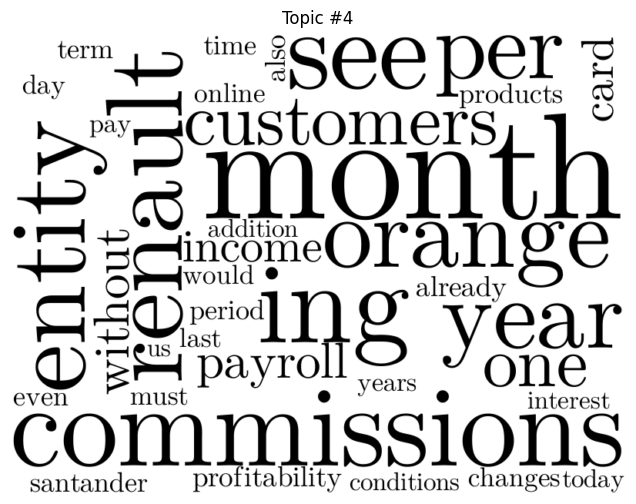

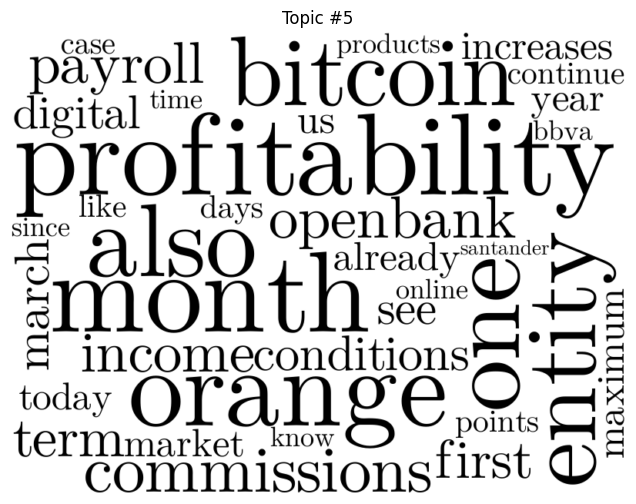

In [47]:
from wordcloud import WordCloud
import emojis
import matplotlib.pyplot as plt

# Define a font path that supports emojis
font_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/github_thesis/deloitte_digital_banking/tucapital_scraper/emoj_Symbola/Symbola.otf'

def generate_wordclouds(topics, dictionary, font_path, score_threshold=0.00001):
    excluded_words = {"bank", "banks", "apr", "client", "clients", "account", "accounts",
                      "deposit", "deposits", "banco", "new", "months", "offer", "offers", "money"}

    for topic_num, topic_words in topics:
        # Remove excluded words and apply score threshold
        filtered_topic_words = [(word, freq) for word, freq in topic_words if word.lower() not in excluded_words and freq >= score_threshold]

        word_freq = dict(filtered_topic_words)
        wordcloud = WordCloud(
            width=800,
            height=600,
            background_color='white',
            color_func=lambda *args, **kwargs: "black",  # Default color for non-emojis
            font_path=font_path,  # Specify emoji support
            min_font_size=10,
            regexp=r"\S+",  # Regular expression to include all non-whitespace characters
        ).generate_from_frequencies(word_freq)
        
        # Define a custom color function for emojis
        def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
            if word in emojis.UNICODE_EMOJI:  # Check if the word is an emoji
                return "lightblue"  # Set color for emojis
            else:
                return "black"  # Default color for non-emojis
        
        # Apply the custom color function
        wordcloud.color_func = color_func
        
        plt.figure(figsize=(8, 6), facecolor=None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'Topic #{topic_num}')
        plt.show()

# Generate word clouds for each topic
generate_wordclouds(topics, lda_model.id2word, font_path, score_threshold=0.001)


In [48]:
df_copy.head(5)

title  \
0  Tomorrow, last day of the account at 2.89% APR...   
1  ING gives you up to €120 if you direct your pa...   
2  Banco BIG deposits: slight increase in normal ...   
3  The future of Bitcoin: predictions for the nex...   
4  Eco: Cetelem only allows maximum daily transfe...   

                                                 url       date  \
0  https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1  https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2  https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3  https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4  https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   

                                                text  \
0  Tomorrow, April 24, 2024, the marketing period...   
1  ING now asks, in addition to direct debiting a...   
2  Banco BIG remodels its deposit offer with slig...   
3  Since its launch, Bitcoin has seen positive an...   
4  Due to the disappearance of Orange Bank, and t...   

                                       combined_text  word_count  year  \
0  tomorrow last day account apr deposit apr rena...         318  2024   
1  ing gives direct payroll pay card ing gives di...         400  2024   
2  banco big deposits slight increase normal comb...         476  2024   
3  future bitcoin predictions next years future b...         656  2024   
4  eco cetelem allows maximum daily transfers eco...         450  2024   

                                        topic_scores  dominant_topic  \
0  [(0, 0.12626715), (1, 0.001080124), (2, 0.0010...               4   
1  [(0, 0.047485646), (1, 0.942512), (2, 0.001001...               1   
2  [(0, 0.99649715), (1, 0.0007009482), (2, 0.000...               0   
3  [(0, 0.0004339847), (1, 0.0004342081), (2, 0.0...               5   
4  [(0, 0.00077776366), (1, 0.9961053), (2, 0.000...               1   

  month_year  
0    2024-04  
1    2024-04  
2    2024-04  
3    2024-04  
4    2024-04

In [49]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='account_products')

bank_df.head(5)

Unnamed: 0                    account product           bank  \
0           1                         Cuenta N26            N26   
1           2             Cuenta Online Sabadell  Banc Sabadell   
2           3                Cuenta Clara Abanca         ABANCA   
3           4  Cuenta Inteligente Bienvenida Evo      EVO Banco   
4           5                   Cuenta No Cuenta            ING   

        url - bank product information  
0  n26.com/es-es/cuenta-sin-comisiones  
1       bancsabadell.com/cuenta-online  
2  abanca.com/es/cuentas/cuenta-online  
3     evobanco.com/cuenta-inteligente/  
4           ing.es/cuenta-nocuenta-ing

In [50]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products_VF.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='bank & accounts',skiprows=2)

bank_df.rename(columns={'url' : 'url - bank product information','account':'account product'}, inplace=True)
bank_df.head(5)

Unnamed: 0               bank               account product  \
0         1.0         abanca.com           Cuenta Online Clara   
1         2.0  bancosantander.es       Cuenta Online Santander   
2         3.0   bancsabadell.com        Cuenta Online Sabadell   
3         4.0      bankinter.com       Cuenta Nómina Bankinter   
4         5.0            bbva.es  Cuenta Online Sin Comisiones   

                      url - bank product information  
0                abanca.com/es/cuentas/cuenta-online  
1  bancosantander.es/particulares/cuentas-tarjeta...  
2                     bancsabadell.com/cuenta-online  
3  bankinter.com/banca/cuentas-tarjetas/cuentas/c...  
4  bbva.es/personas/productos/cuentas/cuenta-onli...

In [51]:
# Convert 'Account Product' in bank_df to lowercase
bank_df['account product'] = bank_df['account product'].str.lower()

merged_df = bank_df
merged_df['account product'].nunique()

13

In [52]:
cleaned_df = merged_df.dropna(subset=['account product'])

In [55]:
cleaned_df.rename(columns={'url - bank product information' : 'URL'}, inplace=True)

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products_VF.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='Accounts Traffic (Desktop)', skiprows = 3)
web_traffic_df.head(5)

Date  abanca.com/es/cuentas/cuenta-online  \
0 2021-12-01                         15202.983835   
1 2022-01-01                         42183.913207   
2 2022-02-01                         34498.153115   
3 2022-03-01                         34546.319021   
4 2022-04-01                         40508.288420   

   bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones  \
0                                       22325.885971                                                 
1                                       28331.245044                                                 
2                                       23798.819170                                                 
3                                       24808.561729                                                 
4                                       24739.758729                                                 

   bancsabadell.com/cuenta-online  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina  \
0                                        8733.560835            
1                                       11410.593443            
2                                        8891.661053            
3                                        7446.925144            
4                                       10285.861726            

   bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html  \
0                                       45449.486787                      
1                                       38306.464983                      
2                                       40978.325821                      
3                                       43970.545627                      
4                                       40782.451956                      

   caixabank.es/particular/cuentas/cuenta-sin-comisiones.html  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   evobanco.com/cuenta-inteligente  ing.es/cuenta-nomina-ing  \
0                      5055.542564              84404.564991   
1                      4539.012047             110783.295080   
2                      6049.457905              79688.098029   
3                      9826.193608              80021.161861   
4                      5028.236254              74071.446350   

   ing.es/cuenta-nocuenta-ing  myinvestor.es/cuentas-tarjetas/cuentas  \
0                         NaN                             5319.608623   
1                         NaN                             6577.851993   
2                         NaN                             4031.716960   
3                         NaN                             4941.009311   
4                         NaN                             5774.734455   

   n26.com/es-es/cuenta-ahorro  n26.com/es-es/cuenta-sin-comisiones  \
0                          NaN                          6664.368911   
1                          NaN                          5310.177360   
2                          NaN                          5547.588971   
3                          NaN                          4900.271300   
4                          NaN                          4909.581023   

   openbank.es/cuenta-ahorro-bienvenida  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   revolut.com/es-ES/a-radically-better-account/  
0                                    1343.418328  
1       

In [56]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(5)), long_web_traffic_df['URL'].nunique()

        Date                                  URL   Web Traffic
0 2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1 2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2 2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3 2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4 2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420


(None, 14)

In [57]:
long_web_traffic_df['Date'] = pd.to_datetime(long_web_traffic_df['Date'])

web_traffic_merged_df = pd.merge(
    cleaned_df, 
    long_web_traffic_df, 
    how='left', 
    on=['URL']
)

In [58]:
# Drop unnecessary columns
specific_category_df = web_traffic_merged_df.drop(columns=['Unnamed: 0', 'URL'])
specific_category_df.head(5)

bank      account product       Date   Web Traffic
0  abanca.com  cuenta online clara 2021-12-01  15202.983835
1  abanca.com  cuenta online clara 2022-01-01  42183.913207
2  abanca.com  cuenta online clara 2022-02-01  34498.153115
3  abanca.com  cuenta online clara 2022-03-01  34546.319021
4  abanca.com  cuenta online clara 2022-04-01  40508.288420

In [59]:
df_copy.head(5)

title  \
0  Tomorrow, last day of the account at 2.89% APR...   
1  ING gives you up to €120 if you direct your pa...   
2  Banco BIG deposits: slight increase in normal ...   
3  The future of Bitcoin: predictions for the nex...   
4  Eco: Cetelem only allows maximum daily transfe...   

                                                 url       date  \
0  https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1  https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2  https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3  https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4  https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   

                                                text  \
0  Tomorrow, April 24, 2024, the marketing period...   
1  ING now asks, in addition to direct debiting a...   
2  Banco BIG remodels its deposit offer with slig...   
3  Since its launch, Bitcoin has seen positive an...   
4  Due to the disappearance of Orange Bank, and t...   

                                       combined_text  word_count  year  \
0  tomorrow last day account apr deposit apr rena...         318  2024   
1  ing gives direct payroll pay card ing gives di...         400  2024   
2  banco big deposits slight increase normal comb...         476  2024   
3  future bitcoin predictions next years future b...         656  2024   
4  eco cetelem allows maximum daily transfers eco...         450  2024   

                                        topic_scores  dominant_topic  \
0  [(0, 0.12626715), (1, 0.001080124), (2, 0.0010...               4   
1  [(0, 0.047485646), (1, 0.942512), (2, 0.001001...               1   
2  [(0, 0.99649715), (1, 0.0007009482), (2, 0.000...               0   
3  [(0, 0.0004339847), (1, 0.0004342081), (2, 0.0...               5   
4  [(0, 0.00077776366), (1, 0.9961053), (2, 0.000...               1   

  month_year  
0    2024-04  
1    2024-04  
2    2024-04  
3    2024-04  
4    2024-04

### Merge Article data with Web Traffic data ----- Prepararing for model

In [60]:
from collections import defaultdict

# Ensure 'date' is in datetime format and extract 'month_year'
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['month_year'] = df_copy['date'].dt.to_period('M').astype(str)

# Initialize a dictionary to hold the sum of topic scores for each month and account product
topic_scores_by_month = defaultdict(lambda: defaultdict(float))

# Sum the topic scores for each document by month_year
for i, row in df_copy.iterrows():
    month_year = row['month_year']
    for topic, score in row['topic_scores']:
        topic_scores_by_month[month_year][topic] += score

# Convert the dictionary to a DataFrame for easier analysis and visualization
topic_scores_df = pd.DataFrame(topic_scores_by_month).T.reset_index()
topic_scores_df.columns = ['month_year'] + [f'topic_{i}' for i in range(len(topic_scores_df.columns) - 1)]

# Display the topic scores by month
display(topic_scores_df.head(3))

month_year    topic_0    topic_1   topic_2   topic_3   topic_4   topic_5
0    2024-04   8.646887  11.748401  2.076855  0.751315  4.043099  1.733443
1    2024-03   7.977824   8.164131  2.559730  3.857079  5.263551  0.177684
2    2024-02  22.655673   9.989678  3.433644  0.535299  2.688225  1.697480

In [61]:
# Convert the 'Date' column in specific_category_df to period format for merging
specific_category_df['month_year'] = pd.to_datetime(specific_category_df['Date']).dt.to_period('M').astype(str)

# Merge the web traffic data with the aggregated topic scores data
merged_df = pd.merge(specific_category_df, topic_scores_df, on='month_year', how='left')

# Drop unnecessary columns
merged_df.drop(columns=['Date'], inplace=True)

# Display the first few rows of the merged dataframe
display(merged_df.head(3)),merged_df['Web Traffic'].isnull().count()

bank      account product   Web Traffic month_year   topic_0  \
0  abanca.com  cuenta online clara  15202.983835    2021-12  3.337507   
1  abanca.com  cuenta online clara  42183.913207    2022-01  2.683793   
2  abanca.com  cuenta online clara  34498.153115    2022-02  3.743583   

    topic_1   topic_2   topic_3   topic_4   topic_5  
0  4.623250  3.695718  3.085761  2.165576  0.092187  
1  6.798754  2.499575  2.012523  3.373025  1.632329  
2  4.827289  1.871747  4.630937  1.913939  0.012506

(None, 378)

In [62]:
merged_df.dropna(subset=['Web Traffic'], inplace=True)

In [63]:
print("Number of NaNs in 'Web Traffic':", merged_df['Web Traffic'].isna().sum())

Number of NaNs in 'Web Traffic': 0


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (topic scores) and target (web traffic)
X = merged_df.drop(columns=['Web Traffic', 'bank', 'account product', 'month_year'])
y = merged_df['Web Traffic']

print("Number of NaNs in features:", X.isna().sum().sum())
print("Number of NaNs in target:", y.isna().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)


Number of NaNs in features: 0
Number of NaNs in target: 0
Mean Squared Error: 518199610.65231055
   Feature  Importance
0  topic_0    0.209665
1  topic_1    0.196221
5  topic_5    0.172130
2  topic_2    0.160918
4  topic_4    0.152587
3  topic_3    0.108479


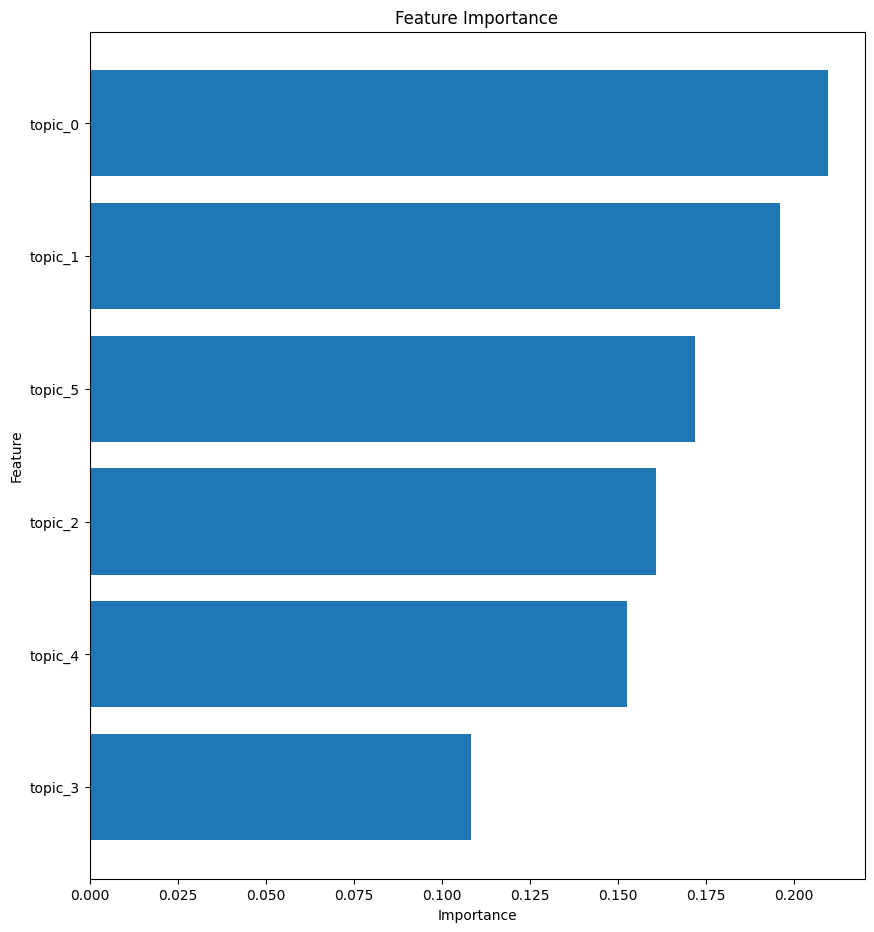

In [65]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 11))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [66]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Improved Mean Squared Error: {mse}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: -0.2413215023319669
Improved Mean Squared Error: 511163943.10540545


R-squared: -0.14828558933949165
Mean Absolute Error: 19154.514089810687
Mean Squared Error: 511163943.10540545


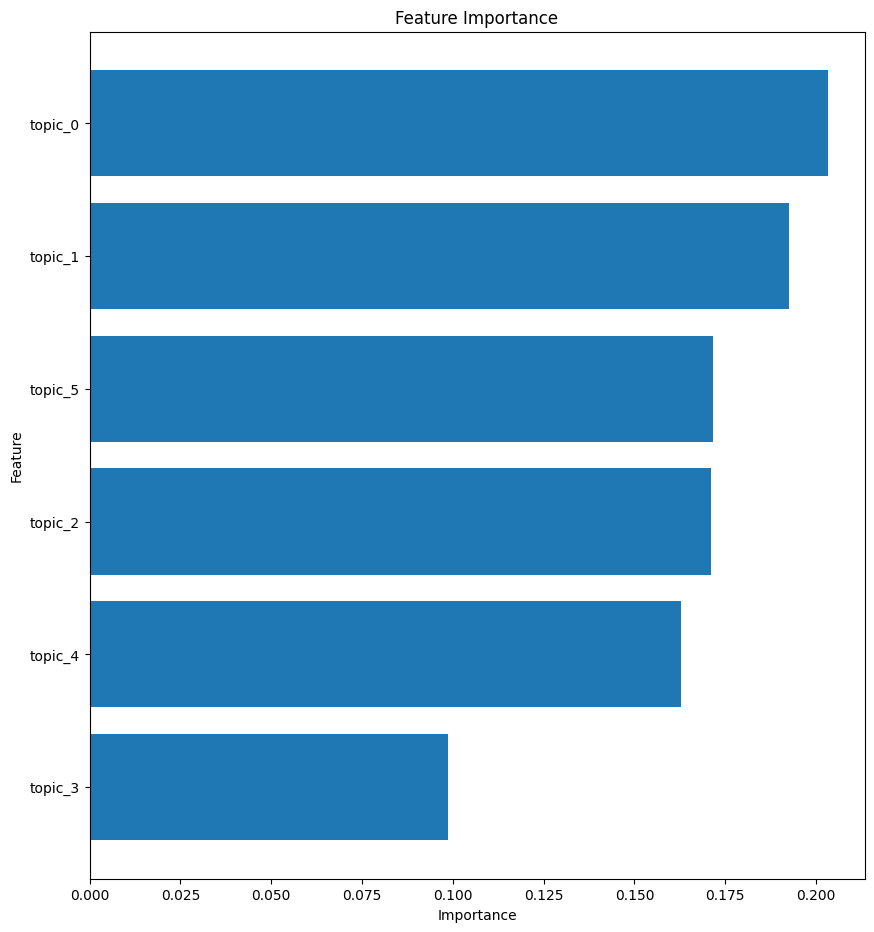

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot feature importance
import matplotlib.pyplot as plt

# Feature importance
importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 11))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

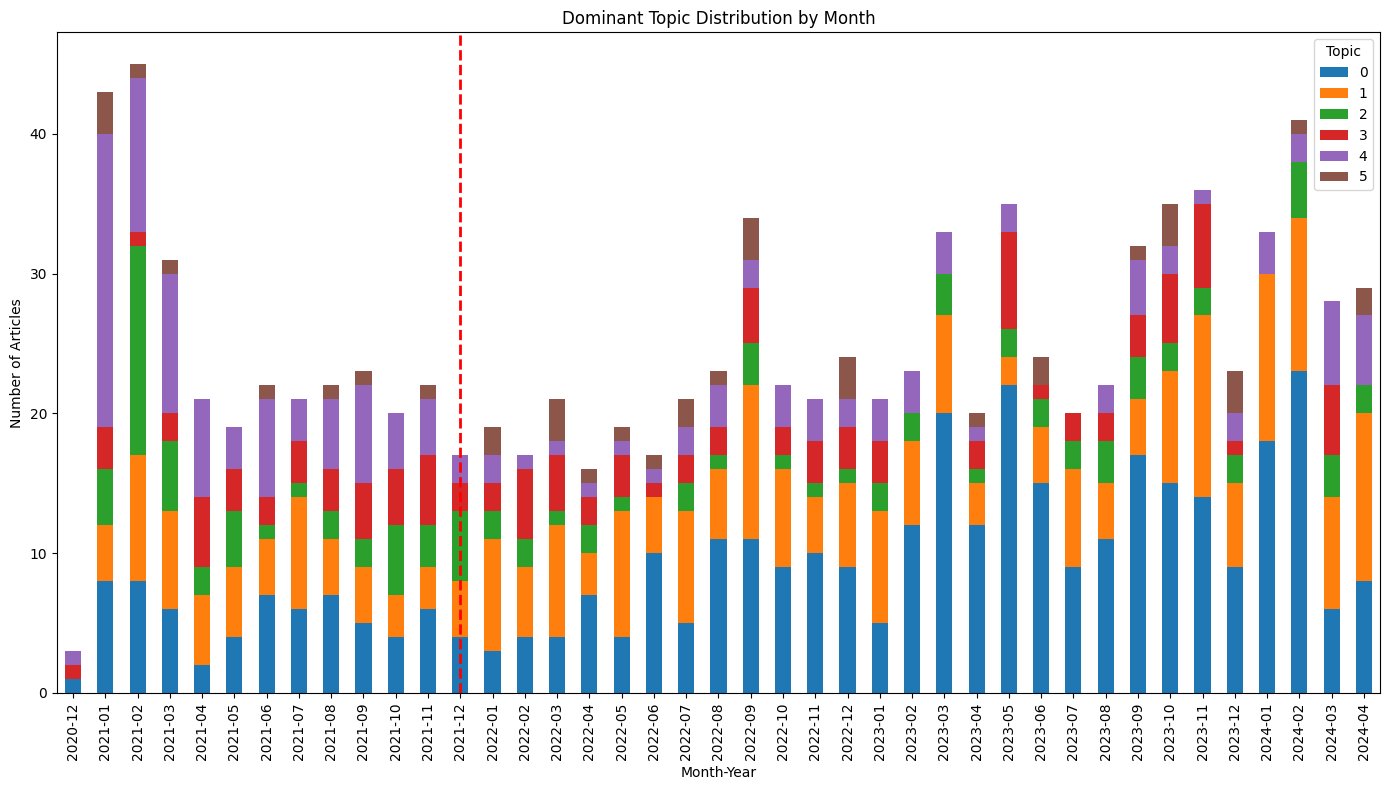

In [68]:
# Add a column for the dominant topic in each document
df_copy['dominant_topic'] = [max(doc, key=lambda x: x[1])[0] for doc in doc_topics]

# Group by month and dominant topic to see the distribution
dominant_topic_distribution = df_copy.groupby(['month_year', 'dominant_topic']).size().unstack(fill_value=0)

# Plot the dominant topic distribution by month
dominant_topic_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Dominant Topic Distribution by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Articles')
plt.legend(title='Topic')
plt.axvline(x=dominant_topic_distribution.index.get_loc('2021-12'), color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')
plt.tight_layout()
plt.show()


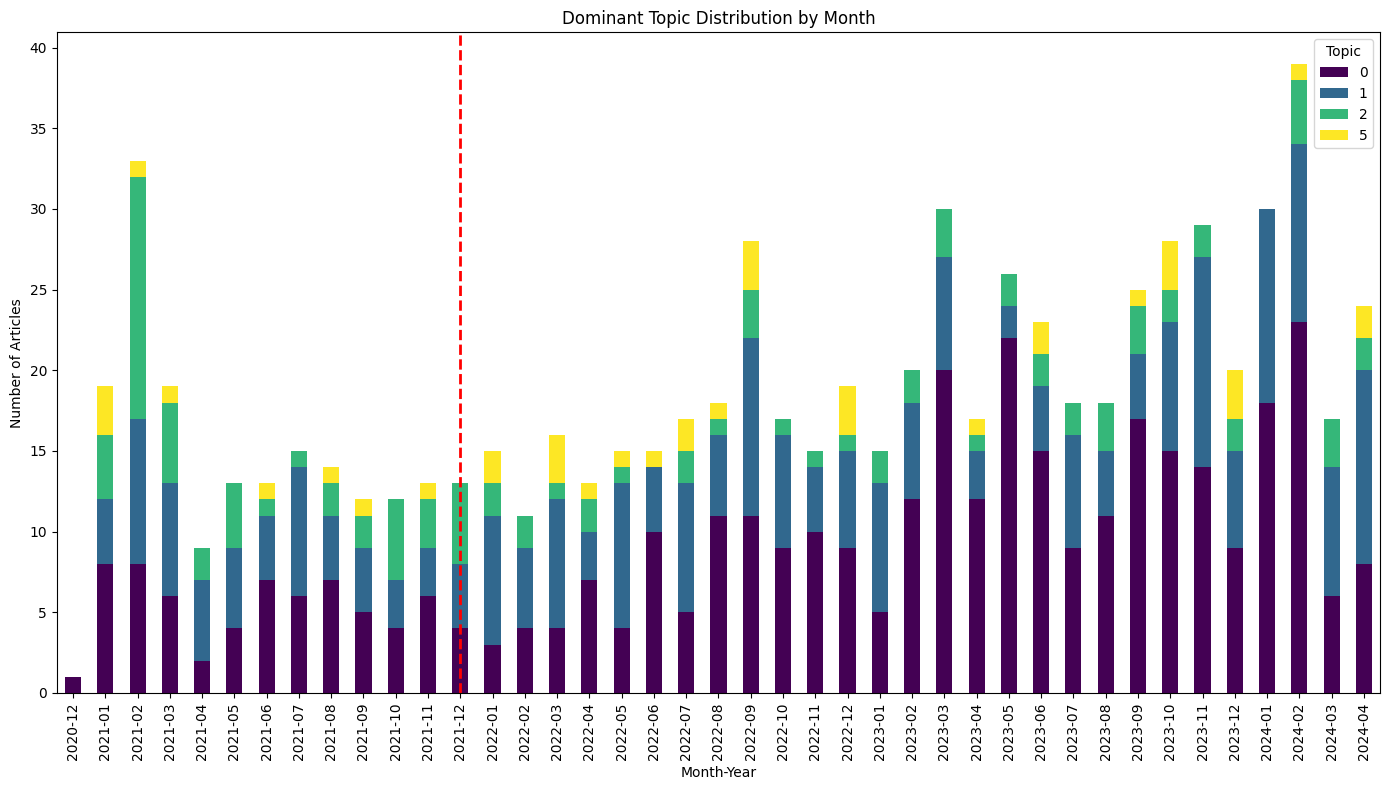

In [70]:
import matplotlib.pyplot as plt

# Add a column for the dominant topic in each document
df_copy['dominant_topic'] = [max(doc, key=lambda x: x[1])[0] for doc in doc_topics]

# Filter the DataFrame to include only the desired topics
desired_topics = [0, 1, 2, 5]
filtered_df_copy = df_copy[df_copy['dominant_topic'].isin(desired_topics)]

# Group by month and dominant topic to see the distribution
dominant_topic_distribution = filtered_df_copy.groupby(['month_year', 'dominant_topic']).size().unstack(fill_value=0)

# Plot the dominant topic distribution by month
dominant_topic_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Dominant Topic Distribution by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Articles')
plt.legend(title='Topic')
plt.axvline(x=dominant_topic_distribution.index.get_loc('2021-12'), color='red', linestyle='--', linewidth=2, label='Start of Web Traffic Data')
plt.tight_layout()
plt.show()


In [71]:
csv_file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/df_copy.csv'

# Save the DataFrame to a CSV file
df_copy.to_csv(csv_file_path, index=False)

In [72]:
df_copy.columns

Index(['title', 'url', 'date', 'text', 'combined_text', 'word_count', 'year',
       'topic_scores', 'dominant_topic', 'month_year'],
      dtype='object')

In [74]:
from collections import defaultdict

# Ensure 'date' is in datetime format and extract 'month_year'
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['month_year'] = df_copy['date'].dt.to_period('M').astype(str)

# Initialize a dictionary to hold the sum of topic scores for each month
topic_scores_by_month = defaultdict(lambda: defaultdict(float))

# Sum the topic scores for each document by month_year
for i, row in df_copy.iterrows():
    month_year = row['month_year']
    for topic, score in row['topic_scores']:
        topic_scores_by_month[month_year][topic] += score

# Convert the dictionary to a DataFrame for easier analysis and visualization
topic_scores_df = pd.DataFrame(topic_scores_by_month).T.reset_index()

# Set the column names correctly (adjusting for the actual number of topics)
num_topics = len(topic_scores_df.columns) - 1
column_names = ['month_year'] + [f'topic_{i}' for i in range(num_topics)]
topic_scores_df.columns = column_names

# Keep only the desired topics
desired_topics = ['month_year', 'topic_0', 'topic_1', 'topic_2','topic_5','topic_3','topic_4']
topic_scores_df = topic_scores_df[desired_topics]

# Merge the desired columns from df_copy with the topic scores DataFrame
df_copy_filtered = df_copy[['title', 'url', 'date', 'combined_text', 'text', 'month_year', 'dominant_topic','topic_scores']]
merged_df = pd.merge(df_copy_filtered, topic_scores_df, on='month_year', how='left')

In [77]:
df_copy_filtered

title  \
0     Tomorrow, last day of the account at 2.89% APR...   
1     ING gives you up to €120 if you direct your pa...   
2     Banco BIG deposits: slight increase in normal ...   
3     The future of Bitcoin: predictions for the nex...   
4     Eco: Cetelem only allows maximum daily transfe...   
...                                                 ...   
1013  Pibank and Pichincha maintain your deposit at ...   
1014  New year, new taxes. This is how the Treasury ...   
1015  Big Bank, RenaultBank...and OrangeBank?, new a...   
1016  Goodbye 2020, black year of banking fees. News...   
1017  Wizink with an incident in its Electronic Bank...   

                                                    url       date  \
0     https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1     https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2     https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3     https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4     https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   
...                                                 ...        ...   
1013  https://www.tucapital.es/cuentas/pibank-y-pich... 2021-01-04   
1014  https://www.tucapital.es/blogs/noticias/ano-nu... 2021-01-04   
1015  https://www.tucapital.es/cuentas/banco-big-ren... 2020-12-31   
1016  https://www.tucapital.es/blogs/noticias/adios-... 2020-12-30   
1017  https://www.tucapital.es/cuentas/wizink-con-un... 2020-12-29   

                                          combined_text  \
0     tomorrow last day account apr deposit apr rena...   
1     ing gives direct payroll pay card ing gives di...   
2     banco big deposits slight increase normal comb...   
3     future bitcoin predictions next years future b...   
4     eco cetelem allows maximum daily transfers eco...   
...                                                 ...   
1013  pibank pichincha maintain deposit apr january ...   
1014  new year new taxes treasury reach pockets new ...   
1015  big bank renaultbank orangebank new profitable...   
1016  goodbye black year banking fees news summary g...   
1017  wizink incident electronic banking leaves clie...   

                                                   text month_year  \
0     Tomorrow, April 24, 2024, the marketing period...    2024-04   
1     ING now asks, in addition to direct debiting a...    2024-04   
2     Banco BIG remodels its deposit offer with slig...    2024-04   
3     Since its launch, Bitcoin has seen positive an...    2024-04   
4     Due to the disappearance of Orange Bank, and t...    2024-04   
...                                                 ...        ...   
1013  Pibank, the online office of Banco Pichincha, ...    2021-01   
1014  I wish that with this first post of the year w...    2021-01   
1015  As we told you yesterday (see here), 2020 has ...    2020-12   
1016  2020 has been a black year. It has been the ye...    2020-12   
1017  It had been a while, but Wizink's electronic b...    2020-12   

      dominant_topic                                       topic_scores  
0                  4  [(0, 0.12626715), (1, 0.001080124), (2, 0.0010...  
1                  1  [(0, 0.047485646), (1, 0.942512), (2, 0.001001...  
2                  0  [(0, 0.99649715), (1, 0.0007009482), (2, 0.000...  
3                  5  [(0, 0.0004339847), (1, 0.0004342081), (2, 0.0...  
4                  1  [(0, 0.00077776366), (1, 0.9961053), (2, 0.000...  
...              ...                                                ...  
1013               0  [(0, 0.56253207), (1, 0.4239125), (2, 0.000805...  
1014               0  [(0, 0.56087863), (1, 0.32747966), (2, 0.00071...  
1015               0  [(0, 0.99364495), (1, 0.0033220744), (2, 0.000...  
1016               4  [(0, 0.0005046447), (1, 0.00050493533), (2, 0....  
1017               3  [(0, 0.2540952), (1, 0.035397317), (2, 0.15471...  

[1018 rows x 8 columns]

In [76]:
df_copy

title  \
0     Tomorrow, last day of the account at 2.89% APR...   
1     ING gives you up to €120 if you direct your pa...   
2     Banco BIG deposits: slight increase in normal ...   
3     The future of Bitcoin: predictions for the nex...   
4     Eco: Cetelem only allows maximum daily transfe...   
...                                                 ...   
1013  Pibank and Pichincha maintain your deposit at ...   
1014  New year, new taxes. This is how the Treasury ...   
1015  Big Bank, RenaultBank...and OrangeBank?, new a...   
1016  Goodbye 2020, black year of banking fees. News...   
1017  Wizink with an incident in its Electronic Bank...   

                                                    url       date  \
0     https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1     https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2     https://www.tucapital.es/depositos/depositos-d... 2024-04-22   
3     https://www.tucapital.es/blogs/guias/el-futuro... 2024-04-22   
4     https://www.tucapital.es/blogs/eco/eco-cetelem... 2024-04-19   
...                                                 ...        ...   
1013  https://www.tucapital.es/cuentas/pibank-y-pich... 2021-01-04   
1014  https://www.tucapital.es/blogs/noticias/ano-nu... 2021-01-04   
1015  https://www.tucapital.es/cuentas/banco-big-ren... 2020-12-31   
1016  https://www.tucapital.es/blogs/noticias/adios-... 2020-12-30   
1017  https://www.tucapital.es/cuentas/wizink-con-un... 2020-12-29   

                                                   text  \
0     Tomorrow, April 24, 2024, the marketing period...   
1     ING now asks, in addition to direct debiting a...   
2     Banco BIG remodels its deposit offer with slig...   
3     Since its launch, Bitcoin has seen positive an...   
4     Due to the disappearance of Orange Bank, and t...   
...                                                 ...   
1013  Pibank, the online office of Banco Pichincha, ...   
1014  I wish that with this first post of the year w...   
1015  As we told you yesterday (see here), 2020 has ...   
1016  2020 has been a black year. It has been the ye...   
1017  It had been a while, but Wizink's electronic b...   

                                          combined_text  word_count  year  \
0     tomorrow last day account apr deposit apr rena...         318  2024   
1     ing gives direct payroll pay card ing gives di...         400  2024   
2     banco big deposits slight increase normal comb...         476  2024   
3     future bitcoin predictions next years future b...         656  2024   
4     eco cetelem allows maximum daily transfers eco...         450  2024   
...                                                 ...         ...   ...   
1013  pibank pichincha maintain deposit apr january ...         426  2021   
1014  new year new taxes treasury reach pockets new ...         572  2021   
1015  big bank renaultbank orangebank new profitable...         443  2020   
1016  goodbye black year banking fees news summary g...         733  2020   
1017  wizink incident electronic banking leaves clie...         408  2020   

                                           topic_scores  dominant_topic  \
0     [(0, 0.12626715), (1, 0.001080124), (2, 0.0010...               4   
1     [(0, 0.047485646), (1, 0.942512), (2, 0.001001...               1   
2     [(0, 0.99649715), (1, 0.0007009482), (2, 0.000...               0   
3     [(0, 0.0004339847), (1, 0.0004342081), (2, 0.0...               5   
4     [(0, 0.00077776366), (1, 0.9961053), (2, 0.000...               1   
...                                                 ...             ...   
1013  [(0, 0.56253207), (1, 0.4239125), (2, 0.000805...               0   
1014  [(0, 0.56087863), (1, 0.32747966), (2, 0.00071...               0   
1015  [(0, 0.99364495), (1, 0.0033220744), (2, 0.000...               0   
1016  [(0, 0.0005046447), (1, 0.00050493533), (2, 0....               4   
1017  [(0, 0.2540952), (1, 0.035397317), 

In [75]:
# Save the DataFrame to a CSV file
csv_file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/df_copy_filtered.csv'
merged_df.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to {csv_file_path}')

DataFrame saved to D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/df_copy_filtered.csv


#### Regression

In [107]:
# Load the regression_clean_data.csv file
regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\final_regression_data.csv"
regression_clean_data = pd.read_csv(regression_clean_data_path)

# Convert the date column to datetime format
regression_clean_data['date'] = pd.to_datetime(regression_clean_data['date'])

# Create the month_year column as period type
regression_clean_data['month_year'] = regression_clean_data['date'].dt.to_period('M')

# Display the first few rows of the loaded data
display(regression_clean_data.head(3))
display(df_copy_filtered.head(3))

bank       date   web_traffic  number_of_employee  \
0  abanca 2021-12-01  15202.983835                5946   
1  abanca 2021-12-01  15202.983835                5946   
2  abanca 2021-12-01  15202.983835                5946   

   assets_under_management  number_of_branches  age  has_stores  \
0              72148000000                 690   13           1   
1              72148000000                 690   13           1   
2              72148000000                 690   13           1   

   founded_before_2000  cross_visitation  search_interest  rank  \
0                    0          0.077994        17.652686   4.0   
1                    0          0.077994        17.652686   4.0   
2                    0          0.077994        17.652686   4.0   

   category_best_salary_accounts_helmycash  \
0                                        0   
1                                        1   
2                                        0   

   category_best_savings_accounts_helpmycash  incentive  apr  mentions  \
0                                          0      150.0  0.0       1.0   
1                                          0      150.0  0.0       1.0   
2                                          1      150.0  0.0       1.0   

  month_year  
0    2021-12  
1    2021-12  
2    2021-12

title  \
0  Tomorrow, last day of the account at 2.89% APR...   
1  ING gives you up to €120 if you direct your pa...   
2  Banco BIG deposits: slight increase in normal ...   

                                                 url       date  \
0  https://www.tucapital.es/depositos/manana-ulti... 2024-04-23   
1  https://www.tucapital.es/cuentas/ing-te-da-has... 2024-04-22   
2  https://www.tucapital.es/depositos/depositos-d... 2024-04-22   

                                       combined_text  \
0  tomorrow last day account apr deposit apr rena...   
1  ing gives direct payroll pay card ing gives di...   
2  banco big deposits slight increase normal comb...   

                                                text month_year  \
0  Tomorrow, April 24, 2024, the marketing period...    2024-04   
1  ING now asks, in addition to direct debiting a...    2024-04   
2  Banco BIG remodels its deposit offer with slig...    2024-04   

   dominant_topic                                       topic_scores  
0               4  [(0, 0.12626715), (1, 0.001080124), (2, 0.0010...  
1               1  [(0, 0.047485646), (1, 0.942512), (2, 0.001001...  
2               0  [(0, 0.99649715), (1, 0.0007009482), (2, 0.000...

In [108]:
df_copy_filtered['date'] = pd.to_datetime(df_copy_filtered['date'])
df_copy_filtered['month_year'] = df_copy_filtered['date'].dt.to_period('M')

# Create columns for each topic (0 to 5) indicating the monthly counts
topic_counts = df_copy_filtered.pivot_table(index='month_year', columns='dominant_topic', aggfunc='size', fill_value=0)

# Rename columns to indicate topic count
topic_counts.columns = [f'topic_{int(col)}_count' for col in topic_counts.columns]

# Reset index to merge with the regression_clean_data
topic_counts = topic_counts.reset_index()

# Ensure 'month_year' column exists and is in period format in both dataframes
print(regression_clean_data.columns)
print(topic_counts.columns)

# Merge the topic counts with the regression_clean_data
merged_data = pd.merge(regression_clean_data, topic_counts, how='left', left_on='month_year', right_on='month_year')

# Display the merged data
display(merged_data.head(10))


Index(['bank', 'date', 'web_traffic', 'number_of_employee',
       'assets_under_management', 'number_of_branches', 'age', 'has_stores',
       'founded_before_2000', 'cross_visitation', 'search_interest', 'rank',
       'category_best_salary_accounts_helmycash',
       'category_best_savings_accounts_helpmycash', 'incentive', 'apr',
       'mentions', 'month_year'],
      dtype='object')
Index(['month_year', 'topic_0_count', 'topic_1_count', 'topic_2_count',
       'topic_3_count', 'topic_4_count', 'topic_5_count'],
      dtype='object')


bank       date   web_traffic  number_of_employee  \
0  abanca 2021-12-01  15202.983835                5946   
1  abanca 2021-12-01  15202.983835                5946   
2  abanca 2021-12-01  15202.983835                5946   
3  abanca 2022-01-01  42183.913207                5946   
4  abanca 2022-01-01  42183.913207                5946   
5  abanca 2022-01-01  42183.913207                5946   
6  abanca 2022-02-01  34498.153115                5946   
7  abanca 2022-02-01  34498.153115                5946   
8  abanca 2022-02-01  34498.153115                5946   
9  abanca 2022-03-01  34546.319021                5946   

   assets_under_management  number_of_branches  age  has_stores  \
0              72148000000                 690   13           1   
1              72148000000                 690   13           1   
2              72148000000                 690   13           1   
3              72148000000                 690   13           1   
4              72148000000                 690   13           1   
5              72148000000                 690   13           1   
6              72148000000                 690   13           1   
7              72148000000                 690   13           1   
8              72148000000                 690   13           1   
9              72148000000                 690   13           1   

   founded_before_2000  cross_visitation  ...  incentive  apr  mentions  \
0                    0          0.077994  ...      150.0  0.0       1.0   
1                    0          0.077994  ...      150.0  0.0       1.0   
2                    0          0.077994  ...      150.0  0.0       1.0   
3                    0          0.062500  ...      150.0  0.0       1.0   
4                    0          0.062500  ...      150.0  0.0       1.0   
5                    0          0.062500  ...      150.0  0.0       1.0   
6                    0          0.052288  ...      150.0  0.0       2.0   
7                    0          0.052288  ...      150.0  0.0       2.0   
8                    0          0.052288  ...      150.0  0.0       2.0   
9                    0          0.061503  ...      150.0  0.0       2.0   

   month_year  topic_0_count  topic_1_count  topic_2_count topic_3_count  \
0     2021-12              4              4              5             2   
1     2021-12              4              4              5             2   
2     2021-12              4              4              5             2   
3     2022-01              3              8              2             2   
4     2022-01              3              8              2             2   
5     2022-01              3              8              2             2   
6     2022-02              4              5              2             5   
7     2022-02              4              5              2             5   
8     2022-02              4              5              2             5   
9     2022-03              4              8              1             4   

   topic_4_count  topic_5_count  
0              2              0  
1              2              0  
2              2              0  
3              2              2  
4              2              2  
5              2              2  
6              1              0  
7              1              0  
8              1              0  
9              1              3  

[10 rows x 24 columns]

In [116]:
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr',
       'mentions', 'search_interest']

topics_vars = ['topic_0_count', 'topic_1_count' , 'topic_2_count' , 'topic_3_count' , 'topic_4_count', 'topic_5_count']

In [117]:
data = merged_data
# Ensure the relevant columns are numeric
data[ind_vars] = data[ind_vars].apply(pd.to_numeric, errors='coerce')
data['web_traffic'] = pd.to_numeric(data['web_traffic'], errors='coerce')

data.isna().sum()

bank                                         0
date                                         0
web_traffic                                  0
number_of_employee                           0
assets_under_management                      0
number_of_branches                           0
age                                          0
has_stores                                   0
founded_before_2000                          0
cross_visitation                             0
search_interest                              0
rank                                         0
category_best_salary_accounts_helmycash      0
category_best_savings_accounts_helpmycash    0
incentive                                    0
apr                                          0
mentions                                     0
month_year                                   0
topic_0_count                                0
topic_1_count                                0
topic_2_count                                0
topic_3_count

In [122]:
import statsmodels.api as sm

ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr',
       'mentions', 'search_interest'] + ['topic_0_count', 'topic_1_count' , 'topic_2_count' , 'topic_5_count']

for bank in data['bank'].unique():
    bank_data = data[data['bank'] == bank]
    X = bank_data[ind_vars]
    y = bank_data['web_traffic']
    X = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"Results for bank: {bank}")
    print(results.summary2())

Results for bank: abanca
                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.611     
Dependent Variable:       web_traffic          AIC:                    1611.7405 
Date:                     2024-06-17 05:48     BIC:                    1637.2328 
No. Observations:         75                   Log-Likelihood:         -794.87   
Df Model:                 10                   F-statistic:            12.62     
Df Residuals:             64                   Prob (F-statistic):     8.89e-12  
R-squared:                0.663                Scale:                  1.1014e+08
---------------------------------------------------------------------------------
                    Coef.       Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------
const              10337.1358  17513.6792  0.5902 0.5571  -24650.4605  45324.7320
cross_visitation

In [127]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame and 'ind_vars' is a list of independent variable names.
for bank in data['bank'].unique():
    bank_data = data[data['bank'] == bank]
    fig = go.Figure()
    
    # Add web traffic trace
    fig.add_trace(go.Scatter(x=bank_data['date'], y=bank_data['web_traffic'], mode='lines', name='web_traffic', yaxis='y1'))
    
    # Add independent variables traces
    for ind_var in ind_vars:
        fig.add_trace(go.Scatter(x=bank_data['date'], y=bank_data[ind_var], mode='lines', name=ind_var, yaxis='y2'))
    
    # Update layout for secondary y-axis
    fig.update_layout(
        title=f"{bank} Web Traffic and Independent Variables",
        xaxis_title="Date",
        yaxis=dict(
            title="Web Traffic",
            titlefont=dict(color="#000000"),
            tickfont=dict(color="#000000")
        ),
        yaxis2=dict(
            title="Independent Variables",
            titlefont=dict(color="#000000"),
            tickfont=dict(color="#000000"),
            overlaying='y',
            side='right'
        )
        # move legend to the right so there is no overlap with the secondary y-axis
        ,legend=dict(x=1.1, y=1)
        
    )
    
    fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed